In [2]:
import os
import requests
import base64
import time

# GitHubアクセストークン
access_token = ''

# 検索条件を指定
query = 'filename:.circleci/config.yml'

# GitHub APIのURL
search_pagenum = 4
url = f'https://api.github.com/search/code?q={query}&page={search_pagenum}'  # 3ページ目の結果を取得

def get_file_content(file_url):
    raw_response = requests.get(file_url, headers={'Authorization': f'Bearer {access_token}'}).json()
    #print(raw_response)
    content = raw_response['content']
    #decoded_content = content.encode('utf-8').decode('base64')
    #return decoded_content
    return content

def write_file_content(code_text, file_url, count, filenum_count_in_same_file):
    from_github_file = "from_github_file/filenum_" + str(search_pagenum) +"_"+ str(count) + "_" + str(filenum_count_in_same_file) + ".yml"
    with open(from_github_file, 'w') as from_github_file:
        from_github_file.write(file_url + "\n")
        from_github_file.write(code_text)


def get_directory_contents(directory_url):
    # ディレクトリの内容を取得
    response = requests.get(directory_url, headers={'Authorization': f'Bearer {access_token}'}).json()
    contents = response
    return contents

In [550]:
# ページ単位の結果を取得
response = requests.get(url, headers={'Authorization': f'Bearer {access_token}'})
data = response.json()

filenum_count = 0
for item in data['items'][filenum_count:]:
    file_url = item['html_url']
    ##追加部分
    if len(file_url.split("/")[7:-2])>0:
        print("long")
        url_with_folda = ""
        for i in file_url.split("/")[7:-2]:
            url_with_folda += i + "/"
        url_with_folda += ".circleci/config.yml"
        raw_file_url = item['repository']['contents_url'].replace('{+path}', url_with_folda)
    else:
        raw_file_url = item['repository']['contents_url'].replace('{+path}', '.circleci/config.yml')
    ##ここまで
    print(f"File URL: {file_url}  -  File Count: {filenum_count}")
    
    try:
        # ディレクトリ内のファイルとディレクトリを取得
        dir_contents = get_directory_contents(os.path.dirname(raw_file_url))
        
        filenum_count_in_same_file = 0
        for content_item in dir_contents:
            content_type = content_item['type']
            content_name = content_item['name']
            if content_type == 'file':
                content_url = content_item['html_url']
                get_file_name = raw_file_url.replace(raw_file_url.split("/")[-1],content_name)
                print(f"  File in Directory: {content_name} - URL: {get_file_name}")
                # ここでファイルの内容を取得して保存する処理を行う
                if "config.yml" in content_url.split("/")[-1]:
                    #print(get_file_name)
                    file_content = get_file_content(get_file_name)
                    code_text = base64.b64decode(file_content).decode('utf-8')
                    #print(code_text)
                    write_file_content(code_text, file_url, filenum_count, filenum_count_in_same_file)
                    filenum_count_in_same_file += 1
                    print("=" * 40)
    except:
        print("error")
        print("filenum_count: " + str(filenum_count))
    filenum_count += 1
    print("#" * 40)
    time.sleep(1)


File URL: https://github.com/cyberdefenders/DetectionLabELK/blob/d3e22053f737883b0c8c42224967e976bb988863/.circleci/config.yml  -  File Count: 0
  File in Directory: config.yml - URL: https://api.github.com/repos/cyberdefenders/DetectionLabELK/contents/.circleci/config.yml
########################################
File URL: https://github.com/HVF/franchise/blob/f546c9ae588ffb5089fc7b4e765b924013a5bef7/.circleci/config.yml  -  File Count: 1
  File in Directory: config.yml - URL: https://api.github.com/repos/HVF/franchise/contents/.circleci/config.yml
########################################
long
File URL: https://github.com/anupsv/athena/blob/d553b2e73f24537f56c301aff8bbd8ead6fc1f05/optimism/.circleci/config.yml  -  File Count: 2
  File in Directory: config.yml - URL: https://api.github.com/repos/anupsv/athena/contents/optimism/.circleci/config.yml
########################################
File URL: https://github.com/xiaotianxia/blog/blob/6c1f39328d55de267b0754d7a8f417f9e7900020/.circlec

File URL: https://github.com/2lambda123/transformers/blob/2bd7a27a671fd1d98059124024f580f8f5c0f3b5/.circleci/config.yml  -  File Count: 23
  File in Directory: TROUBLESHOOT.md - URL: https://api.github.com/repos/2lambda123/transformers/contents/.circleci/TROUBLESHOOT.md
  File in Directory: config.yml - URL: https://api.github.com/repos/2lambda123/transformers/contents/.circleci/config.yml
  File in Directory: create_circleci_config.py - URL: https://api.github.com/repos/2lambda123/transformers/contents/.circleci/create_circleci_config.py
########################################
File URL: https://github.com/Merculet/vue-template/blob/c56b92fc3713f7a570db2697e04d5310a902ceed/.circleci/config.yml  -  File Count: 24
  File in Directory: config.yml - URL: https://api.github.com/repos/Merculet/vue-template/contents/.circleci/config.yml
########################################
File URL: https://github.com/sheyude/vue-h5-template/blob/c56b92fc3713f7a570db2697e04d5310a902ceed/.circleci/config.

In [513]:
#テスト用　書き込みはなし
filenum_count = 13
for item in data['items'][filenum_count:filenum_count+1]:
    file_url = item['html_url']
    
    ##追加部分
    if len(file_url.split("/")[7:-2])>0:
        print("long")
        url_with_folda = ""
        for i in file_url.split("/")[7:-2]:
            url_with_folda += i + "/"
        url_with_folda += ".circleci/config.yml"
        raw_file_url = item['repository']['contents_url'].replace('{+path}', url_with_folda)
    else:
        raw_file_url = item['repository']['contents_url'].replace('{+path}', '.circleci/config.yml')
    ##ここまで
    print(f"File URL: {file_url}  -  File Count: {filenum_count}")
    
    try:
        # ディレクトリ内のファイルとディレクトリを取得
        dir_contents = get_directory_contents(os.path.dirname(raw_file_url))
        filenum_count_in_same_file = 0
        for content_item in dir_contents:
            content_type = content_item['type']
            content_name = content_item['name']
            if content_type == 'file':
                content_url = content_item['html_url']
                get_file_name = raw_file_url.replace(raw_file_url.split("/")[-1],content_name)
                print(f"  File in Directory: {content_name} - URL: {get_file_name}")
                # ここでファイルの内容を取得して保存する処理を行う
                if "config.yml" in content_url.split("/")[-1]:
                    #print(get_file_name)
                    file_content = get_file_content(get_file_name)
                    code_text = base64.b64decode(file_content).decode('utf-8')
                    #print(code_text)
                    #write_file_content(code_text, file_url, filenum_count, filenum_count_in_same_file)
                    filenum_count_in_same_file += 1
                    print("=" * 40)
    except:
        print("error")
        print("filenum_count: " + str(filenum_count))
    filenum_count += 1
    print("#" * 40)
    time.sleep(1)

long
File URL: https://github.com/Peter-Lee-67/2023-hisilicon/blob/4aab28e60861db943013098388362622c87aaa34/SASN/sasn_server_code/pytorch_to_caffe_sasn/visionmaster/.circleci/config.yml.in  -  File Count: 13
  File in Directory: .gitignore - URL: https://api.github.com/repos/Peter-Lee-67/2023-hisilicon/contents/SASN/sasn_server_code/pytorch_to_caffe_sasn/visionmaster/.circleci/.gitignore
  File in Directory: config.yml - URL: https://api.github.com/repos/Peter-Lee-67/2023-hisilicon/contents/SASN/sasn_server_code/pytorch_to_caffe_sasn/visionmaster/.circleci/config.yml
  File in Directory: config.yml.in - URL: https://api.github.com/repos/Peter-Lee-67/2023-hisilicon/contents/SASN/sasn_server_code/pytorch_to_caffe_sasn/visionmaster/.circleci/config.yml.in
  File in Directory: regenerate.py - URL: https://api.github.com/repos/Peter-Lee-67/2023-hisilicon/contents/SASN/sasn_server_code/pytorch_to_caffe_sasn/visionmaster/.circleci/regenerate.py
########################################


In [516]:
print(len(data['items']))

30


In [380]:
#githubから集めたファイルをどーにかする。
#これをフォルダ名とそのファイルの中からから取得できるようにする
print(len(data['items']))
#print(data['items'][28]['html_url'])
for item in data['items']:
    #print(item['html_url'])
    print(item['html_url'].split('/')[3:5])

30
['facebook', 'react']
['kpumuk', 'meta-tags']
['pytorch', 'pytorch']
['locationtech', 'geotrellis']
['shadowsocks', 'shadowsocks-android']
['joellliu', 'SegmentAndComplete']
['pfouto', 'engage-cassandra']
['streamich', 'react-use']
['isLinXu', 'DL_Frame_Models']
['wagtail', 'wagtail']
['nrwl', 'nx']
['ponzu-cms', 'ponzu']
['gliderlabs', 'docker-alpine']
['francisco-munoz', 'ampe_environment']
['beobal', '_cassandra']
['splunk', 'splunk-operator']
['filecoin-project', 'venus']
['AleoHQ', 'snarkOS']
['huangyingw', 'pytorch_vision']
['trojan-gfw', 'igniter']
['beobal', '_cassandra']
['dair-iitd', 'DeGPR']
['anacrolix', 'torrent']
['SpaceVim', 'SpaceVim']
['apollographql', 'apollo-client']
['node-webrtc', 'node-webrtc']
['mengwanguc', 'torchvision-meng']
['ckan', 'ckan']
['nodesource', 'distributions']
['ptmt', 'react-native-macos']


In [35]:
#get_file_name_and_create_file():
def get_file_name_and_create_file(get_file_num):
    diff_foldernames = glob.glob("from_github_file/"+"*")

    for diff_foldernamea in diff_foldernames[get_file_num:get_file_num+1]:

        print(diff_foldernamea)
        #print(diff_foldernamea.split('_')[-2])
        with open(diff_foldernamea, 'r') as diff_foldername:

            text = diff_foldername.readlines()[0]
            print(text)
            print(text.split('/')[3:5])
            print(diff_foldernamea.split("\\")[-1].split(".")[0])
            print("=" * 100)
            output_list = [text.split('/')[3],text.split('/')[4],diff_foldernamea.split("\\")[-1].split(".")[0]]
            print(output_list)
            return output_list

In [549]:
print(diff_foldernames[1])

from_github_file\filenum_1_10_0.yml


In [658]:
print(download_url)
print(commit_api_url)
#print(commit_details['files'][0]['patch'])

https://raw.githubusercontent.com/pytorch/pytorch/7264b757639b9d55d53bd8ec75664728113345ee/.circleci/config.yml
https://api.github.com/repos/pytorch/pytorch/commits


In [50]:
#変更される前のファイルを全て取得する。その時のコードw全て
import requests
import os
import glob

# GitHubリポジトリの情報
#このURLからgithubにある履歴を取得する。その時のファイルと変更点を別のフォルダに書き込む
#ファイルの数はAPI制限のせいで、59個まで
#ここの関数の数字を一つづつ増やしていく
owner_and_name = get_file_name_and_create_file(60)
#owner_and_name = ['facebook', 'react', 'filenum_1_0_0']

#フォルダを作成する
new_dir_name =  str(owner_and_name[2])
new_dir_path = new_dir_name
os.mkdir("from_github_history_allcode/"+new_dir_path)

print("create new folda")


repo_owner = owner_and_name[0]
repo_name = owner_and_name[1]
#ここ調節しなあかんな
file_path = '.circleci/config.yml'
diff_output_directory = 'C:/Users/kato/Desktop/4/from_github_history_allcode/' + new_dir_path

# GitHub APIへのアクセストークン（必要に応じて）
headers = {
    'Authorization': ''
}

# コミット履歴を取得する
commit_api_url = f'https://api.github.com/repos/{repo_owner}/{repo_name}/commits'
params = {
    'path': file_path,
    'per_page': 60
}
response = requests.get(commit_api_url, headers=headers, params=params)
commits = response.json()

# コミットごとにファイルをダウンロードする
count = 0
#print(len(commits))
for commit in commits:
    commit_sha = commit['sha']
    commit_details_url = f'https://api.github.com/repos/{repo_owner}/{repo_name}/commits/{commit_sha}'
    commit_details_response = requests.get(commit_details_url, headers=headers)
    commit_details = commit_details_response.json()
    count += 1
    #print(commit_sha)
    for file in commit_details['files']:
        #print(file)
        if file['filename'] == file_path:
            download_url = f'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{commit_sha}/{file_path}'
            
            # ファイルのダウンロード
            response = requests.get(download_url)
            
            if response.status_code == 200:
                # ダウンロードしたファイルを保存する
                commit_date = commit['commit']['committer']['date']
                
                formatted_date = commit_date.replace(':', '-')
                diff_output_file = os.path.join(diff_output_directory, f'{formatted_date}_{os.path.basename(file_path)}')
                
                #diffファイル二は変更履歴を書き込む
                file_content = response.text
                with open(diff_output_file, "w") as f:
                    f.write(file_content)
                print(f'ファイルをダウンロードしました: {diff_output_file}')
            else:
                print(f'ファイルのダウンロードに失敗しました。HTTPステータスコード: {response.status_code}')

print(len(commits))
print("end down load")
print(count)

from_github_file\filenum_2_26_0.yml
https://github.com/Zeisberg-GmbH/prometheus-2.36.1/blob/ee117713230930c85b34dc32d452443424eb2933/.circleci/config.yml

['Zeisberg-GmbH', 'prometheus-2.36.1']
filenum_2_26_0
['Zeisberg-GmbH', 'prometheus-2.36.1', 'filenum_2_26_0']
create new folda
ファイルをダウンロードしました: C:/Users/kato/Desktop/4/from_github_history_allcode/filenum_2_26_0\2022-05-26T08-17-21Z_config.yml
ファイルをダウンロードしました: C:/Users/kato/Desktop/4/from_github_history_allcode/filenum_2_26_0\2022-04-12T18-22-51Z_config.yml
ファイルをダウンロードしました: C:/Users/kato/Desktop/4/from_github_history_allcode/filenum_2_26_0\2022-04-12T17-23-02Z_config.yml
ファイルをダウンロードしました: C:/Users/kato/Desktop/4/from_github_history_allcode/filenum_2_26_0\2022-04-12T09-00-54Z_config.yml
ファイルをダウンロードしました: C:/Users/kato/Desktop/4/from_github_history_allcode/filenum_2_26_0\2022-04-06T18-23-55Z_config.yml
ファイルをダウンロードしました: C:/Users/kato/Desktop/4/from_github_history_allcode/filenum_2_26_0\2022-03-30T22-16-54Z_config.yml
ファイルをダウンロードしました: C:/U

KeyError: 'files'

In [7]:
new_dir_name

'filenum_1_10_0'

In [582]:
#各ファイルの変更履歴（追加された、削除された関係なし）を新たに作成したファイルに書き込んでいく
#処理的には+ - を削除する
def get_add_or_delete_code(filename,filenum,namecount,setting):
    with open(filename, 'rb') as diff_file:
        b_text = diff_file.read()
        change_point = 0
        change_point = len(b_text.split("@@".encode()))
        with open("gethistory/" + str(setting)+ str(filenum) + str(namecount) + ".yml", 'w', encoding='utf-8') as output_file:
            for i in range(2,change_point,2):
                for i in b_text.split("@@".encode())[i].decode().splitlines():
                    if i.startswith("+"):
                        #print(i.replace("+      ","       ").replace("-      ","      "))
                        if (setting == "add" or setting == "both"):
                            output_file.write(i.replace("+"," ") + " #add+ \n")
                        continue
                    if i.startswith("-"):
                        #print(i.replace("+      ","       ").replace("-      ","      "))
                        if (setting == "dele" or setting == "both"):
                            output_file.write(i.replace("-  ","   ") + " #add- \n")
                        continue
                    output_file.write(i + " \n")
                output_file.write(" \n")

In [ ]:
diff_foldernames = glob.glob("diff"+"*")

for diff_foldername in diff_foldernames:
    diff_filenames = glob.glob(str(diff_foldername)+"/*")

    namecount = 0
    for diff_filename in diff_filenames:
        #print(diff_output_file)
        get_add_or_delete_code(diff_filename, diff_foldername, namecount,"both")
        namecount += 1
    print("end " + diff_foldername)

In [623]:
#各ファイルの変更履歴（追加された、削除された関係なし）を新たに作成したファイルに書き込んでいく
#処理的には+ - を削除する
#gethistoryを調節する用にこっちを使う。
def get_add_or_delete_code(filename,filenum,namecount,setting):
    with open(filename, 'rb') as diff_file:
        b_text = diff_file.read()
        change_point = 0
        change_point = len(b_text.split("@@".encode()))
        with open(str(is_exsist_foldaname) + "/" + str(filename.split("\\")[2]), 'w', encoding='utf-8') as output_file:
            for i in range(2,change_point,2):
                for i in b_text.split("@@".encode())[i].decode().splitlines():
                    if i.startswith("+"):
                        #print(i.replace("+      ","       ").replace("-      ","      "))
                        if (setting == "add" or setting == "both"):
                            output_file.write(i.replace("+"," ") + " #add+ \n")
                        continue
                    if i.startswith("-"):
                        #print(i.replace("+      ","       ").replace("-      ","      "))
                        if (setting == "dele" or setting == "both"):
                            output_file.write(i.replace("-  ","   ") + " #add- \n")
                        continue
                    output_file.write(i + " \n")
                output_file.write(" \n")

In [770]:
diff_foldernames = glob.glob("from_github_hisotry/"+"*")

for diff_foldername in diff_foldernames:
    print(diff_foldername)
    # フォルダの存在を確認
    is_exsist_foldaname = "form_github_searchdata/" + str(diff_foldername.split("\\")[1])
    print(is_exsist_foldaname)
    if os.path.exists(is_exsist_foldaname):
        if os.path.isdir(is_exsist_foldaname):
            print(f"フォルダ '{is_exsist_foldaname}' は既に存在します。")
        else:
            print(f"'{is_exsist_foldaname}' は既に存在しますが、フォルダではありません。")
    else:
        print(f"フォルダ '{is_exsist_foldaname}' は存在しません。")
        new_dir_name =  str(diff_foldername.split("\\")[1])
        new_dir_path = os.path.join(dir_path, new_dir_name)
        os.mkdir("form_github_searchdata/"+new_dir_path)
        print("create new folda")
    
    diff_filenames = glob.glob(str(diff_foldername)+"/*")
    namecount = 0
    for diff_filename in diff_filenames:
        #print(diff_output_file)
        get_add_or_delete_code(diff_filename, is_exsist_foldaname, namecount,"both")
        namecount += 1
    print("end " + diff_foldername)

from_github_hisotry\filenum_1_0_0
form_github_searchdata/filenum_1_0_0
フォルダ 'form_github_searchdata/filenum_1_0_0' は既に存在します。


NameError: name 'get_add_or_delete_code' is not defined

In [2018]:
#空白のタブ文字を処理する
import yaml
import glob
diff_foldernames = glob.glob("from_github_history_allcode/"+"*")

for diff_foldername in diff_foldernames:
    #print(diff_foldername)
    # フォルダの存在を確認
    is_exsist_foldaname = "from_github_history_allcode_clear/" + str(diff_foldername.split("\\")[1])
    print(is_exsist_foldaname)
    if os.path.exists(is_exsist_foldaname):
        if os.path.isdir(is_exsist_foldaname):
            print(f"フォルダ '{is_exsist_foldaname}' は既に存在します。")
        else:
            print(f"'{is_exsist_foldaname}' は既に存在しますが、フォルダではありません。")
    else:
        print(f"フォルダ '{is_exsist_foldaname}' は存在しません。")
        new_dir_name =  str(diff_foldername.split("\\")[1])
        new_dir_path = new_dir_name
        os.mkdir("from_github_history_allcode_clear/"+new_dir_path)
        print("create new folda")

# YAMLファイルの読み込み
diff_all_foldernames = glob.glob("from_github_history_allcode/"+"*/" + "*")
for file in diff_all_foldernames:
    with open(file, "r") as text_file:
        text_files = text_file.readlines()
    
    # プロパティファイルに保存
    with open("from_github_history_allcode_clear/" + str(file.split("\\")[1]) + "/" + str(file.split("\\")[2]), "w") as properties_file:
        
        for text in text_files:
            properties_file.write(text.replace("\t"," ")) 

from_github_history_allcode_clear/filenum_1_0_0
フォルダ 'from_github_history_allcode_clear/filenum_1_0_0' は既に存在します。
from_github_history_allcode_clear/filenum_1_10_0
フォルダ 'from_github_history_allcode_clear/filenum_1_10_0' は既に存在します。
from_github_history_allcode_clear/filenum_1_12_0
フォルダ 'from_github_history_allcode_clear/filenum_1_12_0' は既に存在します。
from_github_history_allcode_clear/filenum_1_13_0
フォルダ 'from_github_history_allcode_clear/filenum_1_13_0' は既に存在します。
from_github_history_allcode_clear/filenum_1_13_1
フォルダ 'from_github_history_allcode_clear/filenum_1_13_1' は既に存在します。
from_github_history_allcode_clear/filenum_1_14_0
フォルダ 'from_github_history_allcode_clear/filenum_1_14_0' は既に存在します。
from_github_history_allcode_clear/filenum_1_15_0
フォルダ 'from_github_history_allcode_clear/filenum_1_15_0' は既に存在します。
from_github_history_allcode_clear/filenum_1_15_1
フォルダ 'from_github_history_allcode_clear/filenum_1_15_1' は既に存在します。
from_github_history_allcode_clear/filenum_1_16_0
フォルダ 'from_github_history_allcode

In [2019]:
# YAMLファイルの読み込み
diff_all_foldernames = glob.glob("from_github_history_allcode/"+"*/" + "*")
for file in diff_all_foldernames[0:4]:
    with open(file, "r") as text_file:
        text_files = text_file.readlines()
    
    # プロパティファイルに保存
    with open("from_github_history_allcode_clear/" + str(file.split("\\")[1]) + "/" + str(file.split("\\")[2]), "w") as properties_file:
        
        for text in text_files:
            properties_file.write(text.replace("\t"," ")) 

In [2020]:
#propertiresフォルダを作成
import yaml
import glob
diff_foldernames = glob.glob("from_github_history_allcode_clear/"+"*")

for diff_foldername in diff_foldernames:
    #print(diff_foldername)
    # フォルダの存在を確認
    is_exsist_foldaname = "properties_file/" + str(diff_foldername.split("\\")[1])
    print(is_exsist_foldaname)
    if os.path.exists(is_exsist_foldaname):
        if os.path.isdir(is_exsist_foldaname):
            print(f"フォルダ '{is_exsist_foldaname}' は既に存在します。")
        else:
            print(f"'{is_exsist_foldaname}' は既に存在しますが、フォルダではありません。")
    else:
        print(f"フォルダ '{is_exsist_foldaname}' は存在しません。")
        new_dir_name =  str(diff_foldername.split("\\")[1])
        new_dir_path = new_dir_name
        os.mkdir("properties_file/"+new_dir_path)
        print("create new folda")

properties_file/filenum_1_0_0
フォルダ 'properties_file/filenum_1_0_0' は既に存在します。
properties_file/filenum_1_10_0
フォルダ 'properties_file/filenum_1_10_0' は既に存在します。
properties_file/filenum_1_12_0
フォルダ 'properties_file/filenum_1_12_0' は既に存在します。
properties_file/filenum_1_13_0
フォルダ 'properties_file/filenum_1_13_0' は既に存在します。
properties_file/filenum_1_13_1
フォルダ 'properties_file/filenum_1_13_1' は既に存在します。
properties_file/filenum_1_14_0
フォルダ 'properties_file/filenum_1_14_0' は既に存在します。
properties_file/filenum_1_15_0
フォルダ 'properties_file/filenum_1_15_0' は既に存在します。
properties_file/filenum_1_15_1
フォルダ 'properties_file/filenum_1_15_1' は既に存在します。
properties_file/filenum_1_16_0
フォルダ 'properties_file/filenum_1_16_0' は既に存在します。
properties_file/filenum_1_17_0
フォルダ 'properties_file/filenum_1_17_0' は既に存在します。
properties_file/filenum_1_17_1
フォルダ 'properties_file/filenum_1_17_1' は既に存在します。
properties_file/filenum_1_18_0
フォルダ 'properties_file/filenum_1_18_0' は既に存在します。
properties_file/filenum_1_19_0
フォルダ 'properties_file/f

In [548]:
#すでに府フォルダが付く割られているかを核にsンるう。
#propertiresフォルダを作成
import yaml
import glob
def is_exsist_file(filename):
    #print(diff_foldername)
    # フォルダの存在を確認
    is_exsist_foldaname = "properties_file/" + str(filename.split("\\")[1]) + "/" + str(filename.split("\\")[2].split(".")[0]) + ".properties"
    if os.path.isfile(is_exsist_foldaname):
        return True
    else:
        return False

In [118]:
#a = is_exsist_file("from_github_history_allcode_clear/filenum_1_0_0/2021-02-11T00-09-20Z_config.properties")
a = is_exsist_file(diff_all_foldernames[0])
print(a)
print(diff_all_foldernames[0])

True
from_github_history_allcode_clear\filenum_1_0_0\2021-02-11T00-09-20Z_config.yml


In [2021]:
#プロパティ化
#これを使う前にファイルの中でタブ文字を使っているのを空白に変換する必要がある
def yaml_to_properties(yaml_data):
    properties = []

    def traverse(data, path=[]):
        if isinstance(data, dict):
            for key, value in data.items():
                traverse(value, path + [key])
        elif isinstance(data, list):
            for index, value in enumerate(data):
                traverse(value, path + [str(index)])
        else:
            properties.append(".".join(path) + "=" + str(data).replace("\n"," "))

    traverse(yaml_data)
    return "\n".join(properties)

# YAMLファイルの読み込み
diff_all_foldernames = glob.glob("from_github_history_allcode_clear/"+"*/" + "*")
diff_all_foldernames = glob.glob("from_github_history_allcode_clear\\filenum_1_14_0\\" + "*")
#diff_all_foldernames = ["from_github_history_allcode_clear\\filenum_1_0_0\\2021-06-08T15-40-34Z_config.yml"]
print("yaml to prpperties")
for file in diff_all_foldernames:
    #if is_exsist_file(file):
    if not is_exsist_file(file):
        with open(file, "r") as yaml_file:
            yaml_data = yaml.safe_load(yaml_file)

        # YAMLデータをプロパティファイル形式に変換
        properties_content = yaml_to_properties(yaml_data)

        # プロパティファイルに保存
        save_file_name = "properties_file/" + str(file.split("\\")[1]) + "/" + str(file.split("\\")[2].split(".")[0]) + ".properties"
        with open(save_file_name, "w") as properties_file:
            properties_file.write(properties_content)
        print("ファイルに保存されました: " + str(save_file_name))


yaml to prpperties


In [18]:
diff_all_foldernames = glob.glob("from_github_history_allcode/"+"*/" + "*")
print(diff_all_foldernames[10].split("\\"))
print(diff_all_foldernames[10].split("\\")[2].split(".")[0])

['from_github_history_allcode', 'filenum_1_0_0', '2021-07-22T17-58-57Z_config.yml']
2021-07-22T17-58-57Z_config


In [32]:
#これは上でプロパティ化したものをひあっかうしてついkされたもの、削除されたものをお見つける。
#注意として、compareの引数の順番を間違えると追加されたと削除されたが反対になるからちゅうい！！。
import difflib
import glob

#diff_all_foldernames = glob.glob("properties_file/"+"filenum_1_10_0/" + "*")

# 比較する2つのテキストデータ
def search_diff_two_files(file_before, file_after):
    his = []
    with open(file_before, "r") as properties_file:
        a = properties_file.readlines()
    with open(file_after, "r") as properties_file:
        b = properties_file.readlines()

    # Differオブジェクトの作成
    differ = difflib.Differ()

    # テキストデータの比較
    result = differ.compare(a,b)

    #比較するファイル名
    #print(f"before : {file_before}")
    #print(f"after : {file_after}")
    # 比較結果の表示
    for line in result:
        if line.startswith('-'):
            #print(line)
            his.append(line)
        if line.startswith('+'):
            #print(line)
            his.append(line)
    #print(f"directory : {file_before} done")
    return his

add_dele_properties = []
diff_all_directories = glob.glob("properties_file/"+"*")
"""for diff_all_foldername in diff_all_directories:
    diff_all_foldernames = glob.glob(diff_all_foldername + "/*")
    this_dic_properties = []
    for file_count in range(0,len(diff_all_foldernames)-1):
        this_dic_properties.append(search_diff_two_files(diff_all_foldernames[file_count],diff_all_foldernames[file_count+1]))
    
    add_dele_properties.append(this_dic_properties)
    print(f"{diff_all_foldername} is done")"""
    
this_dic_properties = []
for diff_all_foldername in diff_all_directories[1:]:
    diff_all_foldernames = glob.glob(diff_all_foldername + "/*")

    for file_count in range(0,len(diff_all_foldernames)-1):
        #this_dic_properties.append(search_diff_two_files(diff_all_foldernames[file_count],diff_all_foldernames[file_count+1]))
        test = (search_diff_two_files(diff_all_foldernames[file_count],diff_all_foldernames[file_count+1]))
        
        for i in test:
            if i.split(" ")[0] == "+":
                wirte_filename = "properties_file_add_or_del/" + diff_all_foldername.split("\\")[1] + "/add.properties"
            elif i.split(" ")[0] == "-":
                wirte_filename = "properties_file_add_or_del/" + diff_all_foldername.split("\\")[1] + "/dele.properties"
            else:
                print("error")
            with open(wirte_filename, "a") as properties_file:
                write_sentence = ""
                for sentence in i.split(" ")[1:]:
                    write_sentence += sentence
                properties_file.write(write_sentence)
    print(f"{diff_all_foldername} is done")
    
    #wirte_filename = "properties_file_add_or_del/" + diff_all_foldername.split("\\")[1] + "/add.properties"
    #print(wirte_filename)

print("finished")

properties_file\filenum_1_10_0 is done
properties_file\filenum_1_12_0 is done
properties_file\filenum_1_13_0 is done
properties_file\filenum_1_13_1 is done
properties_file\filenum_1_14_0 is done
properties_file\filenum_1_15_0 is done
properties_file\filenum_1_15_1 is done
properties_file\filenum_1_16_0 is done
properties_file\filenum_1_17_0 is done
properties_file\filenum_1_17_1 is done
properties_file\filenum_1_18_0 is done
properties_file\filenum_1_19_0 is done
properties_file\filenum_1_19_1 is done
properties_file\filenum_1_1_0 is done
properties_file\filenum_1_1_1 is done
properties_file\filenum_1_20_0 is done
properties_file\filenum_1_21_0 is done
properties_file\filenum_1_22_0 is done
properties_file\filenum_1_23_0 is done
properties_file\filenum_1_24_0 is done
properties_file\filenum_1_25_0 is done
properties_file\filenum_1_26_0 is done
properties_file\filenum_1_27_0 is done
properties_file\filenum_1_28_0 is done
properties_file\filenum_1_29_0 is done
properties_file\filenum_1_2

In [20]:
this_dic_properties

[['- workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup\n',
  '+ workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=Publish to Next channel\n',
  '- workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=setup\n',
  '+ workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish to Next channel\n'],
 ['- workflows.publish_preleases_nightly.jobs.1.publish_prerelease.commit_sha=master\n',
  '+ workflows.publish_preleases_nightly.jobs.1.publish_prerelease.commit_sha=<< pipeline.git.revision >>\n',
  '- workflows.publish_preleases_nightly.jobs.2.publish_prerelease.commit_sha=master\n',
  '+ workflows.publish_preleases_nightly.jobs.2.publish_prerelease.commit_sha=<< pipeline.git.revision >>\n']]

In [9]:
#propertiresフォルダを作成
import yaml
import glob
import os
diff_foldernames = glob.glob("properties_file/"+"*")

for diff_foldername in diff_foldernames:
    #print(diff_foldername)
    # フォルダの存在を確認
    is_exsist_foldaname = "properties_file_add_or_del/" + str(diff_foldername.split("\\")[1])
    print(is_exsist_foldaname)
    if os.path.exists(is_exsist_foldaname):
        if os.path.isdir(is_exsist_foldaname):
            print(f"フォルダ '{is_exsist_foldaname}' は既に存在します。")
        else:
            print(f"'{is_exsist_foldaname}' は既に存在しますが、フォルダではありません。")
    else:
        print(f"フォルダ '{is_exsist_foldaname}' は存在しません。")
        new_dir_name =  str(diff_foldername.split("\\")[1])
        new_dir_path = new_dir_name
        os.mkdir("properties_file_add_or_del/"+new_dir_path)
        print("create new folda")

properties_file_add_or_del/filenum_1_0_0
フォルダ 'properties_file_add_or_del/filenum_1_0_0' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_10_0
フォルダ 'properties_file_add_or_del/filenum_1_10_0' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_12_0
フォルダ 'properties_file_add_or_del/filenum_1_12_0' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_13_0
フォルダ 'properties_file_add_or_del/filenum_1_13_0' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_13_1
フォルダ 'properties_file_add_or_del/filenum_1_13_1' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_14_0
フォルダ 'properties_file_add_or_del/filenum_1_14_0' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_15_0
フォルダ 'properties_file_add_or_del/filenum_1_15_0' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_15_1
フォルダ 'properties_file_add_or_del/filenum_1_15_1' は存在しません。
create new folda
properties_file_add_or_del/filenum_1_16_0
フォルダ 'properties_file_ad

In [2023]:
##### + -が続いてた時に編集されていることを確認する。
#++ --になっているときはその一つ前のファイルはどうなっているのかも見ておきたい気持ち
#完全に削除（追加）されたのか一部分の変更なのか 37- 45+多め
def search_properties_pattern(dir_num):
    filename_count = 0
    count_data = []
    #=までのパスをス得する
    added_paths = []
    delete_paths = []
    #パスを全て取得する
    all_added_paths = []
    all_delete_paths = []
    diff_all_foldernames = glob.glob(str(diff_all_directories[dir_num]) + "/*")
    #for a in add_dele_properties[filename_count:filename_count+1]:
    for a in add_dele_properties[dir_num][filename_count:]:
        all_length = 0
        changed_only_items_count = 0
        changed_name_items_count = 0
        changed_only_itemsnum_count = 0
        changed_only_name_count = 0
        extend_command = 0
        another_content = 0
        changed_add_or_delete_count = 0
        print(f"------------------{diff_all_foldernames[filename_count]} to {diff_all_foldernames[filename_count+1]}--------------")
        print(f"filename_count : {filename_count}")
        #変更されたコマンドのパスを集めて、それが編集後のファイルに残ているのかを調べる
        #残っているのなら、一部が編集され、残っていないなら丸ごと削除されている。
        #print(a)
        #更新後にそのコマンドのパスがあるかどうか
        is_there_command_before = []
        is_there_command_after = []
        #for serch in range(0,len(a)-1):
        max_count = len(a)-1
        serch = 0

        while serch < max_count:
            #print(f"serch: {serch}")
            dele_command_text = a[serch].split()[1].split("=")[0]
            add_command_text = a[serch+1].split()[1].split("=")[0]
            #print(dele_command_text)
            if (a[serch].startswith("-") and a[serch+1].startswith("+")):
                #print(dele_command_text)
                #print(add_command_text)
                #単に値が変更されたことが分かる。
                if dele_command_text == add_command_text:
                    changed_only_items_count += 2
                    #print("chaged item")
                #値が一緒の場合にその値がどこで使われたかを調べる　この下は値だけを見ているだけ
                elif a[serch].split("=")[1] == a[serch+1].split("=")[1]:
                    #print("same item")
                    #print(dele_command_text)
                    #print(add_command_text)
                    is_changed_command_num = False
                    is_changed_command_name = False
                    for z in range(0,min(len(dele_command_text.split(".")),len(add_command_text.split(".")))):
                        if not dele_command_text.split(".")[z] == add_command_text.split(".")[z]:
                            if  dele_command_text.split(".")[z].isdecimal():
                                is_changed_command_num = True

                            #値は一緒でコマンドの場所だけが変わることがある？jobs名とかを変更したとか？
                            else:
                                is_changed_command_name = True

                            #print(type(int(qw1.split(".")[z])))
                    if is_changed_command_num and is_changed_command_name:
                        #print("changed command name same items")
                        #print("only diff num affected other text")
                        #print(dele_command_text)
                        #print(add_command_text)
                        changed_name_items_count += 2
                    elif is_changed_command_num:
                        changed_only_itemsnum_count += 2
                        #print("only diff num affected other text")
                        #print(dele_command_text)
                        #print(add_command_text)
                    elif is_changed_command_name:
                        changed_only_name_count +=2
                        #print("changed command name same items")
                    else:
                        #print("no change")
                        #print(dele_command_text)
                        #print(add_command_text)
                        extend_command += 2
                        #print("="*50)
                    #print(f"予想外 : num - {a[serch]}\n {a[serch+1]}")
                    #print("="*50)
                else:
                    #値とキーが違う場合にくる
                    #print(a[serch])
                    #print(a[serch+1])
                    #print("\n")
                    another_content += 2
                serch+=2
                continue
            #変更した点が++ or -- 最後の要素はいきなりここに飛んでくるのが理想　それまでは最後は見れてない
            elif a[serch].split()[0] == "-":
                changed_add_or_delete_count += 1
                is_there_command_after.append(dele_command_text.split(".")[0:])
                #print("-"*50)
            elif a[serch].split()[0] == "+":
                changed_add_or_delete_count += 1
                is_there_command_before.append(dele_command_text.split(".")[0:])
            else:
                print("error")
            #++の場合は未実装
                #print(a[serch].split("="))
                #print(a[serch+1])           
            """#ファイルにジョブ名とかがあるかを調べてたい
            elif a[serch].startswith("+") and a[serch+1].startswith("+"):
                print("pri add good")
                print(dele_command_text)
                print(add_command_text)"""
            serch+=1
            
        #ラスト位置魚の確認
        if max_count == 0 or max_count == serch:
            if a[-1].split()[0] == "-":
                changed_add_or_delete_count += 1
                is_there_command_after.append(a[-1].split()[1].split("=")[0].split(".")[0:])
                #print("-"*50)
            elif a[-1].split()[0] == "+":
                changed_add_or_delete_count += 1
                is_there_command_before.append(a[-1].split()[1].split("=")[0].split(".")[0:])
            else:
                print("max_count error")
        #した二つの関数実行を忘れずに
        print("------------------result---------------")
        #変更前のファイルを調査sるう
        print("追加されたものを調査")
        #print(is_there_command_before)
        changed_added_paths = reverse_path_from_list(is_there_command_before,diff_all_foldernames[filename_count],0)
        #変更後のファイルを調査sるう
        print("削除されたものを調査")
        #print(is_there_command_after)
        changed_deleted_paths = reverse_path_from_list(is_there_command_after,diff_all_foldernames[filename_count+1],1)
        all_length = len(a)
        filename_count += 1
        print("値が変わっただけのパス(キーは同じ)")
        print(f"changed_only_items_count : {changed_only_items_count}/{all_length}")
        print("場所が変わっただけのパス(数字の部分だけが違う)")
        print(f"changed_only_itemsnum_count : {changed_only_itemsnum_count}/{all_length}")
        print("パスの名前の一部が変更された場合")
        print(f"changed_only_name_count: {changed_only_name_count}/{all_length}")
        print(f"changed_name_items_count : {changed_name_items_count}/{all_length}")
        print(f"extend_command : {extend_command}/{all_length}")
        print("値とパスが変わった場合")
        print(f"another_content : {another_content}/{all_length}")
        print("新たに変更、削除されたパス")
        print(f"changed_add_or_delete_count: {changed_add_or_delete_count}/{all_length}")

        #count_data.append([changed_only_items_count,changed_only_itemsnum_count,changed_only_name_count,changed_name_items_count,extend_command,another_content,changed_add_or_delete_count])
        count_data.append([changed_only_items_count,changed_only_itemsnum_count,changed_only_name_count+changed_name_items_count+extend_command+another_content,changed_add_or_delete_count])
        #値かキーヨットだけが変わったか、場所が変わっただけか、がらっとかわったか
        #count_data.append([changed_only_itemsnum_count,changed_only_items_count+changed_only_name_count+changed_name_items_count+extend_command+another_content,changed_add_or_delete_count])
        
        added_paths.append(changed_added_paths)
        delete_paths.append(changed_deleted_paths)
    return [count_data, added_paths,delete_paths]

In [1325]:
a = "+ jobs.Get Ready.steps.2=checkout"

a.split(".")[0:]

['+ jobs', 'Get Ready', 'steps', '2=checkout']

In [2024]:
#before_or_after 0なら前
def reverse_path_from_list(is_there_command,filename,before_or_after):
    clear_search_data = []
    for command_text_list in is_there_command:
        a = '.'.join(command_text_list)
        clear_search_data.append(a)
    
    if len(clear_search_data) > 0:
        added_paths = is_stay_code_path(clear_search_data,filename,before_or_after)
        return added_paths
    else:
        print("no in list")
        return {}
    #for x in set(clear_search_data):
        #print(x)

In [2025]:
#all add(delete)は追加されたパスの初めが具体的なキー名だった場合のことを表す。
def is_stay_code_path(clear_search_data,filename,before_or_after):
    #diff_all_foldernames = glob.glob("properties_file/"+"filenum_1_0_0/" + "*")
    if before_or_after == 1:
        result_message = "delete"
    else:
        result_message = "add"
    cdss = sorted(set(clear_search_data))
    added_paths = serach_added_path_from(filename,cdss,before_or_after)
    print(added_paths)
    return added_paths
 

In [2026]:
def serach_added_path_from(filepath,new_paths,before_or_after):
    print(filepath)
    with open(filepath, "r") as file:
        existing_paths = file.readlines()

    # 新しく追加されたパスとその部分を保存する辞書
    added_paths = {}
    
    if before_or_after == 0:
        resultword = "追加"
    else:
        resultword = "削除"
    #変更された行
    for new_path in new_paths:
        #ファイルを開いてその中にnew_pathがあるかを確認する。
        if new_path not in existing_paths:
            #print(new_path)
            parts = new_path.split('.')
            #pathを区切って一つずつ見ていく
            for i in range(0,len(parts)):
                parts_text = '.'.join(parts[0:i])
                #print(f"sreach : {parts_text}")
                flag = True
                #各行にあるかどうかを調べる
                for existing_path in existing_paths:
                    if parts_text in existing_path:
                        #print("true\n")
                        flag = False
                        break
                #一回もでなければ新たに追加されたという事で下を実行
                if flag:
                    #path_to_check = '.'.join(parts[i:])
                    #added_parts_text = '.'.join(parts[i-1:])
                    added_parts_text = i-1
                    #print(f"added : {added_parts_text}")
                    added_paths.setdefault(new_path, added_parts_text)
                    break
            #print("\n"*2)
    # 結果を表示
    if added_paths:
        print(f"新しく{resultword}されたパス:")
        for new_path, added_part in added_paths.items():
            print(f"パス: {new_path},\n {resultword}された部分: {added_part}\n")
        return added_paths
    else:
        print(f"新しく{resultword}されたパスはありません。")
        return {}


In [2027]:
count_data = []
added_path = []
delete_path = []

#print("追加された")
#print(added_path)

#print("削除された")
#print(delete_path)
for i in range(0,len(add_dele_properties)):
    #count_data.append(search_properties_pattern(i))
    
    get_data = search_properties_pattern(i)
    count_data.append(get_data[0])

    #print(get_data[1])
    added_path.append(get_data[1])
    delete_path.append(get_data[2])
#diff_all_foldernames = glob.glob(str(diff_all_directories[0]) + "/*")
#print(diff_all_foldernames[0])

------------------properties_file\filenum_1_0_0\2021-02-11T00-09-20Z_config.properties to properties_file\filenum_1_0_0\2021-02-16T06-04-13Z_config.properties--------------
filename_count : 0
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 4/4
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/4
パスの名前の一部が変更された場合
changed_only_name_count: 0/4
changed_name_items_count : 0/4
extend_command : 0/4
値とパスが変わった場合
another_content : 0/4
新たに変更、削除されたパス
changed_add_or_delete_count: 0/4
------------------properties_file\filenum_1_0_0\2021-02-16T06-04-13Z_config.properties to properties_file\filenum_1_0_0\2021-02-16T16-31-24Z_config.properties--------------
filename_count : 1
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 4/4
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/4
パスの名前の一部が変更された場合
changed_only_name_count: 0/4
chang

新しく削除されたパス:
パス: workflows.experimental.jobs.0,
 削除された部分: 1

パス: workflows.experimental.jobs.1.yarn_build.requires.0,
 削除された部分: 1

パス: workflows.experimental.unless,
 削除された部分: 1

{'workflows.experimental.jobs.0': 1, 'workflows.experimental.jobs.1.yarn_build.requires.0': 1, 'workflows.experimental.unless': 1}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/23
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 14/23
パスの名前の一部が変更された場合
changed_only_name_count: 0/23
changed_name_items_count : 0/23
extend_command : 0/23
値とパスが変わった場合
another_content : 2/23
新たに変更、削除されたパス
changed_add_or_delete_count: 5/23
------------------properties_file\filenum_1_0_0\2021-09-21T15-51-51Z_config.properties to properties_file\filenum_1_0_0\2021-09-21T16-23-48Z_config.properties--------------
filename_count : 13
------------------result---------------
追加されたものを調査
properties_file\filenum_1_0_0\2021-09-21T15-51-51Z_config.properties
新しく追加されたパス:
パス: jobs.process_artifacts_combined.steps.8.store_artifacts.path,
 追加さ

------------------result---------------
追加されたものを調査
properties_file\filenum_1_0_0\2021-12-08T15-51-41Z_config.properties
新しく追加されたパス:
パス: jobs.run_devtools_e2e_tests.docker.0.image,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.environment.TZ,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.0,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.1.attach_workspace.at,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.2.run,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.3.restore_cache.keys.0,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.3.restore_cache.name,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.4.run.command,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.4.run.name,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.5.run.command,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.5.run.name,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.6.run.command,
 追加された部分: 1

パス: jobs.run_devtools_e2e_tests.steps.6.run.environment.RELEASE_CHANNEL,
 追加された部分: 1

パス


パス: workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.2,
 追加された部分: 3

パス: workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.3,
 追加された部分: 3

パス: workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.4,
 追加された部分: 3

パス: workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.requires.0,
 追加された部分: 3

{'jobs.run_devtools_e2e_tests_for_versions.docker.0.image': 1, 'jobs.run_devtools_e2e_tests_for_versions.environment.TZ': 1, 'jobs.run_devtools_e2e_tests_for_versions.parallelism': 1, 'jobs.run_devtools_e2e_tests_for_versions.parameters.version.type': 1, 'jobs.run_devtools_e2e_tests_for_versions.steps.0': 1, 'jobs.run_devtools_e2e_tests_for_versions.steps.1.attach_workspace.at': 1, 'jobs.run_devtools_e2e_tests_for_versions.steps.2.run': 1, 'jobs.run_devtools_e2e_tests_for_versions.steps.3.restore_cache.keys.0':

------------------properties_file\filenum_1_0_0\2022-06-08T17-07-05Z_config.properties to properties_file\filenum_1_0_0\2022-09-13T21-54-00Z_config.properties--------------
filename_count : 41
------------------result---------------
追加されたものを調査
properties_file\filenum_1_0_0\2022-06-08T17-07-05Z_config.properties
新しく追加されたパス:
パス: aliases.3.run.command,
 追加された部分: 2

パス: aliases.3.run.name,
 追加された部分: 2

{'aliases.3.run.command': 2, 'aliases.3.run.name': 2}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/73
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 8/73
パスの名前の一部が変更された場合
changed_only_name_count: 0/73
changed_name_items_count : 0/73
extend_command : 42/73
値とパスが変わった場合
another_content : 0/73
新たに変更、削除されたパス
changed_add_or_delete_count: 23/73
------------------properties_file\filenum_1_0_0\2022-09-13T21-54-00Z_config.properties to properties_file\filenum_1_0_0\2022-09-14T17-22-20Z_config.properties--------------
filename_count : 42
------------------result--------

パス: jobs.process_artifacts_combined.steps.8.store_artifacts.path,
 削除された部分: 3

パス: jobs.publish_prerelease.steps.1.run.command,
 削除された部分: 4

パス: jobs.publish_prerelease.steps.1.run.name,
 削除された部分: 4

パス: jobs.run_devtools_e2e_tests.steps.2.run.command,
 削除された部分: 4

パス: jobs.run_devtools_e2e_tests.steps.2.run.name,
 削除された部分: 4

パス: jobs.run_devtools_e2e_tests.steps.3.restore_cache.keys.0,
 削除された部分: 4

パス: jobs.run_devtools_e2e_tests_for_versions.steps.2.run.command,
 削除された部分: 4

パス: jobs.run_devtools_e2e_tests_for_versions.steps.2.run.name,
 削除された部分: 4

パス: jobs.run_devtools_e2e_tests_for_versions.steps.3.restore_cache.keys.0,
 削除された部分: 4

パス: jobs.run_devtools_tests_for_versions.steps.2.run.command,
 削除された部分: 4

パス: jobs.run_devtools_tests_for_versions.steps.2.run.name,
 削除された部分: 4

パス: jobs.run_devtools_tests_for_versions.steps.3.restore_cache.keys.0,
 削除された部分: 4

パス: jobs.scrape_warning_messages.steps.1.run.command,
 削除された部分: 4

パス: jobs.scrape_warning_messages.steps.1.run.name,
 削除さ

------------------result---------------
追加されたものを調査
properties_file\filenum_1_0_0\2022-12-02T04-06-25Z_config.properties
新しく追加されたパス:
パス: commands.setup_node_modules.description,
 追加された部分: 0

パス: commands.setup_node_modules.steps.0.restore_cache.keys.0,
 追加された部分: 0

パス: commands.setup_node_modules.steps.0.restore_cache.keys.1,
 追加された部分: 0

パス: commands.setup_node_modules.steps.0.restore_cache.keys.2,
 追加された部分: 0

パス: commands.setup_node_modules.steps.0.restore_cache.name,
 追加された部分: 0

パス: commands.setup_node_modules.steps.1.run.command,
 追加された部分: 0

パス: commands.setup_node_modules.steps.1.run.name,
 追加された部分: 0

パス: commands.setup_node_modules.steps.2.save_cache.key,
 追加された部分: 0

パス: commands.setup_node_modules.steps.2.save_cache.name,
 追加された部分: 0

パス: commands.setup_node_modules.steps.2.save_cache.paths.0,
 追加された部分: 0

パス: workflows.build_and_test.jobs.1.check_generated_fizz_runtime.filters.branches.ignore.0,
 追加された部分: 4

パス: workflows.build_and_test.jobs.2.yarn_lint.filters.branches.ign

パス: executors.docker-publisher.docker.0.image,
 追加された部分: 0

パス: executors.docker-publisher.environment.IMAGE_FILENAME,
 追加された部分: 0

パス: executors.docker-publisher.environment.IMAGE_NAME,
 追加された部分: 0

パス: executors.golang-builder.docker.0.image,
 追加された部分: 0

パス: executors.golang-builder.environment.IMAGE_FILENAME,
 追加された部分: 0

パス: executors.golang-builder.environment.IMAGE_NAME,
 追加された部分: 0

パス: jobs.build.executor,
 追加された部分: 1

パス: jobs.build.steps.0,
 追加された部分: 1

パス: jobs.build.steps.1.setup_remote_docker.docker_layer_caching,
 追加された部分: 1

パス: jobs.build.steps.2.run.command,
 追加された部分: 1

パス: jobs.build.steps.2.run.name,
 追加された部分: 1

パス: jobs.build.steps.3.run.command,
 追加された部分: 1

パス: jobs.build.steps.3.run.name,
 追加された部分: 1

パス: jobs.build.steps.4,
 追加された部分: 1

パス: jobs.build.steps.5.persist_to_workspace.name,
 追加された部分: 1

パス: jobs.build.steps.5.persist_to_workspace.paths.0,
 追加された部分: 1

パス: jobs.build.steps.5.persist_to_workspace.root,
 追加された部分: 1

パス: jobs.push-edge.executor,
 追加され

追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/2
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/2
パスの名前の一部が変更された場合
changed_only_name_count: 0/2
changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 0/2
------------------properties_file\filenum_1_10_0\2021-02-23T00-23-50Z_config.properties to properties_file\filenum_1_10_0\2021-03-12T21-55-26Z_config.properties--------------
filename_count : 21
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/2
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/2
パスの名前の一部が変更された場合
changed_only_name_count: 0/2
changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 0/2
------------------properties_file\filenum_1_10_0\2021-03-12T21-55-26Z_config.properties to properties

新しく削除されたパス:
パス: jobs.app-framework-tests.executor,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.0.run.command,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.0.run.name,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.1,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.10.run.command,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.10.run.environment.TEST_FOCUS,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.10.run.name,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.11.store_test_results.name,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.11.store_test_results.path,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.12.store_artifacts.path,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.2,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.3,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.4.run.command,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.4.run.name,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.5,
 削除された部分: 1

パス: jobs.app-framework-tests.steps.6.attach_workspace.at,

新しく追加されたパス:
パス: prerelease.docker.0.image,
 追加された部分: 0

パス: prerelease.steps.0,
 追加された部分: 0

パス: prerelease.steps.1,
 追加された部分: 0

パス: prerelease.steps.2.run,
 追加された部分: 0

パス: prerelease.working_directory,
 追加された部分: 0

パス: release.docker.0.image,
 追加された部分: 0

パス: release.steps.0,
 追加された部分: 0

パス: release.steps.1,
 追加された部分: 0

パス: release.steps.2.run,
 追加された部分: 0

パス: release.working_directory,
 追加された部分: 0

{'prerelease.docker.0.image': 0, 'prerelease.steps.0': 0, 'prerelease.steps.1': 0, 'prerelease.steps.2.run': 0, 'prerelease.working_directory': 0, 'release.docker.0.image': 0, 'release.steps.0': 0, 'release.steps.1': 0, 'release.steps.2.run': 0, 'release.working_directory': 0}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 4/14
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/14
パスの名前の一部が変更された場合
changed_only_name_count: 0/14
changed_name_items_count : 0/14
extend_command : 0/14
値とパスが変わった場合
another_content : 0/14
新たに変更、削除されたパス
changed_add_or_delete_count: 1

------------------properties_file\filenum_1_14_0\2020-09-19T18-40-00Z_config.properties to properties_file\filenum_1_14_0\2020-09-19T19-11-41Z_config.properties--------------
filename_count : 0
------------------result---------------
追加されたものを調査
properties_file\filenum_1_14_0\2020-09-19T18-40-00Z_config.properties
新しく追加されたパスはありません。
{}
削除されたものを調査
properties_file\filenum_1_14_0\2020-09-19T19-11-41Z_config.properties
新しく削除されたパス:
パス: run_browserstack.background,
 削除された部分: 0

パス: run_browserstack.command,
 削除された部分: 0

パス: run_browserstack.name,
 削除された部分: 0

{'run_browserstack.background': 0, 'run_browserstack.command': 0, 'run_browserstack.name': 0}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 10/32
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/32
パスの名前の一部が変更された場合
changed_only_name_count: 0/32
changed_name_items_count : 0/32
extend_command : 0/32
値とパスが変わった場合
another_content : 0/32
新たに変更、削除されたパス
changed_add_or_delete_count: 22/32
------------------properties_file\filenum_1_14_0\20

新しく追加されたパスはありません。
{}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 24/32
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/32
パスの名前の一部が変更された場合
changed_only_name_count: 0/32
changed_name_items_count : 0/32
extend_command : 0/32
値とパスが変わった場合
another_content : 0/32
新たに変更、削除されたパス
changed_add_or_delete_count: 8/32
------------------properties_file\filenum_1_14_0\2020-09-19T21-48-03Z_config.properties to properties_file\filenum_1_14_0\2020-09-20T00-18-49Z_config.properties--------------
filename_count : 20
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
properties_file\filenum_1_14_0\2020-09-20T00-18-49Z_config.properties
新しく削除されたパスはありません。
{}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 20/24
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/24
パスの名前の一部が変更された場合
changed_only_name_count: 0/24
changed_name_items_count : 0/24
extend_command : 0/24
値とパスが変わった場合
another_content : 0/24
新たに変更、削除されたパス
changed_add_or_delete_count: 4/24
------

削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/2
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/2
パスの名前の一部が変更された場合
changed_only_name_count: 0/2
changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 0/2
------------------properties_file\filenum_1_14_0\2021-03-15T23-04-10Z_config.properties to properties_file\filenum_1_14_0\2021-03-29T19-55-41Z_config.properties--------------
filename_count : 37
------------------result---------------
追加されたものを調査
properties_file\filenum_1_14_0\2021-03-15T23-04-10Z_config.properties
新しく追加されたパスはありません。
{}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/7
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/7
パスの名前の一部が変更された場合
changed_only_name_count: 0/7
changed_name_items_count : 0/7
extend_command : 0/7
値とパスが変わった場合
another_content : 0/7
新たに変更、削除されたパス
changed_add_or_delete_count: 5/7
------------------properties_file\filenum_1

------------------properties_file\filenum_1_16_0\2018-10-28T20-56-01Z_config.properties to properties_file\filenum_1_16_0\2018-10-28T21-03-25Z_config.properties--------------
filename_count : 0
------------------result---------------
追加されたものを調査
properties_file\filenum_1_16_0\2018-10-28T20-56-01Z_config.properties
新しく追加されたパス:
パス: jobs.all.steps.6.store_artifacts.path,
 追加された部分: 4

パス: jobs.master.steps.6.store_artifacts.path,
 追加された部分: 4

{'jobs.all.steps.6.store_artifacts.path': 4, 'jobs.master.steps.6.store_artifacts.path': 4}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/18
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 16/18
パスの名前の一部が変更された場合
changed_only_name_count: 0/18
changed_name_items_count : 0/18
extend_command : 0/18
値とパスが変わった場合
another_content : 0/18
新たに変更、削除されたパス
changed_add_or_delete_count: 2/18
------------------properties_file\filenum_1_16_0\2018-10-28T21-03-25Z_config.properties to properties_file\filenum_1_16_0\2018-10-28T21-08-43Z_confi

changed_name_items_count : 0/8
extend_command : 0/8
値とパスが変わった場合
another_content : 0/8
新たに変更、削除されたパス
changed_add_or_delete_count: 0/8
------------------properties_file\filenum_1_16_0\2020-01-09T00-26-41Z_config.properties to properties_file\filenum_1_16_0\2020-02-07T03-39-39Z_config.properties--------------
filename_count : 17
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 8/8
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/8
パスの名前の一部が変更された場合
changed_only_name_count: 0/8
changed_name_items_count : 0/8
extend_command : 0/8
値とパスが変わった場合
another_content : 0/8
新たに変更、削除されたパス
changed_add_or_delete_count: 0/8
------------------properties_file\filenum_1_16_0\2020-02-07T03-39-39Z_config.properties to properties_file\filenum_1_16_0\2020-04-10T07-25-33Z_config.properties--------------
filename_count : 18
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
ch

新しく削除されたパス:
パス: jobs.all.steps.8.run.command,
 削除された部分: 4

パス: jobs.all.steps.8.run.name,
 削除された部分: 4

パス: jobs.master.steps.8.run.command,
 削除された部分: 4

パス: jobs.master.steps.8.run.name,
 削除された部分: 4

パス: jobs.next.steps.8.run.command,
 削除された部分: 4

パス: jobs.next.steps.8.run.name,
 削除された部分: 4

{'jobs.all.steps.8.run.command': 4, 'jobs.all.steps.8.run.name': 4, 'jobs.master.steps.8.run.command': 4, 'jobs.master.steps.8.run.name': 4, 'jobs.next.steps.8.run.command': 4, 'jobs.next.steps.8.run.name': 4}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/62
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 54/62
パスの名前の一部が変更された場合
changed_only_name_count: 0/62
changed_name_items_count : 0/62
extend_command : 0/62
値とパスが変わった場合
another_content : 0/62
新たに変更、削除されたパス
changed_add_or_delete_count: 8/62
------------------properties_file\filenum_1_16_0\2021-08-31T21-38-36Z_config.properties to properties_file\filenum_1_16_0\2021-09-01T02-12-01Z_config.properties--------------
filename_count : 33
------

新しく追加されたパスはありません。
{}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/104
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 96/104
パスの名前の一部が変更された場合
changed_only_name_count: 0/104
changed_name_items_count : 0/104
extend_command : 0/104
値とパスが変わった場合
another_content : 0/104
新たに変更、削除されたパス
changed_add_or_delete_count: 8/104
------------------properties_file\filenum_1_18_0\2019-08-16T00-43-21Z_config.properties to properties_file\filenum_1_18_0\2019-08-16T02-41-30Z_config.properties--------------
filename_count : 5
------------------result---------------
追加されたものを調査
properties_file\filenum_1_18_0\2019-08-16T00-43-21Z_config.properties
新しく追加されたパス:
パス: commands.init_clang6.steps.0.run,
 追加された部分: 0

パス: commands.init_gcc7.steps.0.run,
 追加された部分: 0

パス: jobs.cmake_test.description,
 追加された部分: 1

パス: jobs.cmake_test.executor,
 追加された部分: 1

パス: jobs.cmake_test.parameters.compiler.description,
 追加された部分: 1

パス: jobs.cmake_test.parameters.compiler.type,
 追加された部分: 1

パス: jobs.cmak

新しく追加されたパス:
パス: jobs.clang-avx-dynamic.description,
 追加された部分: 1

パス: jobs.clang-avx-dynamic.environment.CMAKE_TEST_FLAGS,
 追加された部分: 1

パス: jobs.clang-avx-dynamic.executor,
 追加された部分: 1

パス: jobs.clang-avx-dynamic.steps.0,
 追加された部分: 1

パス: jobs.clang-avx-dynamic.steps.1,
 追加された部分: 1

パス: jobs.clang-avx-sanitize.description,
 追加された部分: 1

パス: jobs.clang-avx-sanitize.environment.CMAKE_TEST_FLAGS,
 追加された部分: 1

パス: jobs.clang-avx-sanitize.executor,
 追加された部分: 1

パス: jobs.clang-avx-sanitize.steps.0,
 追加された部分: 1

パス: jobs.clang-avx-sanitize.steps.1,
 追加された部分: 1

パス: jobs.clang-avx-static.description,
 追加された部分: 1

パス: jobs.clang-avx-static.environment.CMAKE_TEST_FLAGS,
 追加された部分: 1

パス: jobs.clang-avx-static.executor,
 追加された部分: 1

パス: jobs.clang-avx-static.steps.0,
 追加された部分: 1

パス: jobs.clang-avx-static.steps.1,
 追加された部分: 1

パス: jobs.clang-avx-threaded.description,
 追加された部分: 1

パス: jobs.clang-avx-threaded.environment.CMAKE_TEST_FLAGS,
 追加された部分: 1

パス: jobs.clang-avx-threaded.executor,
 追加された部分: 1


新しく追加されたパス:
パス: commands.make_test.steps.8.run,
 追加された部分: 3

パス: commands.make_test.steps.9.run,
 追加された部分: 3

{'commands.make_test.steps.8.run': 3, 'commands.make_test.steps.9.run': 3}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/2
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/2
パスの名前の一部が変更された場合
changed_only_name_count: 0/2
changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 2/2
------------------properties_file\filenum_1_18_0\2020-01-27T16-25-23Z_config.properties to properties_file\filenum_1_18_0\2020-03-12T21-48-30Z_config.properties--------------
filename_count : 9
------------------result---------------
追加されたものを調査
properties_file\filenum_1_18_0\2020-01-27T16-25-23Z_config.properties
新しく追加されたパス:
パス: jobs.clang-avx-google-benchmarks.description,
 追加された部分: 1

パス: jobs.clang-avx-google-benchmarks.environment.CMAKE_TEST_FLAGS,
 追加された部分: 1

パス: jobs.clang-avx-google-benchmark

新しく追加されたパス:
パス: jobs.clang-avx-noexcept.description,
 追加された部分: 1

パス: jobs.clang-avx-noexcept.environment.CMAKE_TEST_FLAGS,
 追加された部分: 1

パス: jobs.clang-avx-noexcept.executor,
 追加された部分: 1

パス: jobs.clang-avx-noexcept.steps.0,
 追加された部分: 1

パス: jobs.clang-avx-noexcept.steps.1,
 追加された部分: 1

パス: jobs.gcc-avx-noexcept.description,
 追加された部分: 1

パス: jobs.gcc-avx-noexcept.environment.CMAKE_TEST_FLAGS,
 追加された部分: 1

パス: jobs.gcc-avx-noexcept.executor,
 追加された部分: 1

パス: jobs.gcc-avx-noexcept.steps.0,
 追加された部分: 1

{'jobs.clang-avx-noexcept.description': 1, 'jobs.clang-avx-noexcept.environment.CMAKE_TEST_FLAGS': 1, 'jobs.clang-avx-noexcept.executor': 1, 'jobs.clang-avx-noexcept.steps.0': 1, 'jobs.clang-avx-noexcept.steps.1': 1, 'jobs.gcc-avx-noexcept.description': 1, 'jobs.gcc-avx-noexcept.environment.CMAKE_TEST_FLAGS': 1, 'jobs.gcc-avx-noexcept.executor': 1, 'jobs.gcc-avx-noexcept.steps.0': 1}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 6/59
場所が変わっただけのパス(数字の部分だけが違う)
changed_o


パス: commands.cmake_test_all.steps.3.run,
 追加された部分: 1

パス: commands.cmake_test_all.steps.4.run,
 追加された部分: 1

パス: commands.cmake_test_all.steps.5.run,
 追加された部分: 1

パス: jobs.dynamic-clang6.description,
 追加された部分: 1

パス: jobs.dynamic-clang6.environment.CMAKE_FLAGS,
 追加された部分: 1

パス: jobs.dynamic-clang6.executor,
 追加された部分: 1

パス: jobs.dynamic-clang6.steps.0,
 追加された部分: 1

パス: jobs.dynamic-clang6.steps.1,
 追加された部分: 1

パス: jobs.dynamic-clang6.steps.2,
 追加された部分: 1

パス: jobs.dynamic-gcc7.description,
 追加された部分: 1

パス: jobs.dynamic-gcc7.environment.CMAKE_FLAGS,
 追加された部分: 1

パス: jobs.dynamic-gcc7.executor,
 追加された部分: 1

パス: jobs.dynamic-gcc7.steps.0,
 追加された部分: 1

パス: jobs.dynamic-gcc7.steps.1,
 追加された部分: 1

パス: jobs.gcc7.description,
 追加された部分: 1

パス: jobs.gcc7.environment.CMAKE_FLAGS,
 追加された部分: 1

パス: jobs.gcc7.executor,
 追加された部分: 1

パス: jobs.gcc7.steps.0,
 追加された部分: 1

パス: jobs.gcc7.steps.1,
 追加された部分: 1

パス: jobs.sanitize-clang6.description,
 追加された部分: 1

パス: jobs.sanitize-clang6.environment.CMAKE_FLAG

新しく追加されたパスはありません。
{}
削除されたものを調査
properties_file\filenum_1_18_0\2020-04-20T18-23-19Z_config.properties
新しく削除されたパス:
パス: jobs.sanitize-gcc7.description,
 削除された部分: 1

パス: jobs.sanitize-gcc7.environment.BUILD_FLAGS,
 削除された部分: 1

パス: jobs.sanitize-gcc7.environment.CMAKE_FLAGS,
 削除された部分: 1

パス: jobs.sanitize-gcc7.executor,
 削除された部分: 1

{'jobs.sanitize-gcc7.description': 1, 'jobs.sanitize-gcc7.environment.BUILD_FLAGS': 1, 'jobs.sanitize-gcc7.environment.CMAKE_FLAGS': 1, 'jobs.sanitize-gcc7.executor': 1}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/26
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 16/26
パスの名前の一部が変更された場合
changed_only_name_count: 0/26
changed_name_items_count : 0/26
extend_command : 0/26
値とパスが変わった場合
another_content : 2/26
新たに変更、削除されたパス
changed_add_or_delete_count: 6/26
------------------properties_file\filenum_1_18_0\2020-04-20T18-23-19Z_config.properties to properties_file\filenum_1_18_0\2020-04-22T00-33-47Z_config.properties--------------
filename_count : 25
--------

新しく追加されたパスはありません。
{}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/31
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 28/31
パスの名前の一部が変更された場合
changed_only_name_count: 0/31
changed_name_items_count : 0/31
extend_command : 0/31
値とパスが変わった場合
another_content : 0/31
新たに変更、削除されたパス
changed_add_or_delete_count: 1/31
------------------properties_file\filenum_1_18_0\2020-06-24T19-28-28Z_config.properties to properties_file\filenum_1_18_0\2020-06-28T16-25-17Z_config.properties--------------
filename_count : 38
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/2
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/2
パスの名前の一部が変更された場合
changed_only_name_count: 0/2
changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 0/2
------------------properties_file\filenum_1_18_0\2020-06-28T16-25-17Z_config.properties to pro

新しく追加されたパス:
パス: jobs.nocheckeof-clang10.environment.CMAKE_BUILD_FLAGS,
 追加された部分: 1

パス: jobs.nocheckeof-clang10.environment.CTEST_FLAGS,
 追加された部分: 1

パス: jobs.nocheckeof-clang10.environment.CXXFLAGS,
 追加された部分: 1

パス: jobs.nocheckeof-clang10.executor,
 追加された部分: 1

パス: jobs.nocheckeof-clang10.steps.0,
 追加された部分: 1

{'jobs.nocheckeof-clang10.environment.CMAKE_BUILD_FLAGS': 1, 'jobs.nocheckeof-clang10.environment.CTEST_FLAGS': 1, 'jobs.nocheckeof-clang10.environment.CXXFLAGS': 1, 'jobs.nocheckeof-clang10.executor': 1, 'jobs.nocheckeof-clang10.steps.0': 1}
削除されたものを調査
properties_file\filenum_1_18_0\2021-07-23T15-32-26Z_config.properties
新しく削除されたパスはありません。
{}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/21
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/21
パスの名前の一部が変更された場合
changed_only_name_count: 12/21
changed_name_items_count : 0/21
extend_command : 0/21
値とパスが変わった場合
another_content : 2/21
新たに変更、削除されたパス
changed_add_or_delete_count: 7/21
------------------properties_file\filenum_1_1

新しく追加されたパス:
パス: jobs.build-ruby24-rails-4.2.10.steps.11.persist_to_workspace.paths.1,
 追加された部分: 5

パス: jobs.build-ruby24-rails-4.2.10.steps.8.run.command,
 追加された部分: 6

パス: jobs.build-ruby24-rails-4.2.10.steps.8.run.name,
 追加された部分: 6

パス: jobs.build-ruby24-rails-5.0.7.steps.11.persist_to_workspace.paths.1,
 追加された部分: 5

パス: jobs.build-ruby24-rails-5.0.7.steps.8.run.command,
 追加された部分: 6

パス: jobs.build-ruby24-rails-5.0.7.steps.8.run.name,
 追加された部分: 6

パス: jobs.build-ruby24-rails-5.1.6.steps.11.persist_to_workspace.paths.1,
 追加された部分: 5

パス: jobs.build-ruby24-rails-5.1.6.steps.8.run.command,
 追加された部分: 6

パス: jobs.build-ruby24-rails-5.1.6.steps.8.run.name,
 追加された部分: 6

パス: jobs.build-ruby24-rails-5.2.0.steps.11.persist_to_workspace.paths.1,
 追加された部分: 5

パス: jobs.build-ruby24-rails-5.2.0.steps.8.run.command,
 追加された部分: 6

パス: jobs.build-ruby24-rails-5.2.0.steps.8.run.name,
 追加された部分: 6

パス: jobs.build-ruby25-rails-4.2.10.steps.11.persist_to_workspace.paths.1,
 追加された部分: 5

パス: jobs.build-ruby25-

新しく削除されたパス:
パス: jobs.build-ruby24-rails-4.2.10.docker.0.environment.ENABLE_CODE_COVERAGE,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.docker.0.environment.RAILS_VERSION,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.docker.0.image,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.0,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.1.attach_workspace.at,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.10.store_artifacts.destination,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.10.store_artifacts.path,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.11.persist_to_workspace.paths.0,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.11.persist_to_workspace.paths.1,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.11.persist_to_workspace.root,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.2.run.command,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.2.run.name,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.3.run.command,
 


パス: jobs.build-ruby27-rails-6_1_4.steps.8.when.condition,
 追加された部分: 1

パス: jobs.build-ruby27-rails-6_1_4.steps.8.when.name,
 追加された部分: 1

パス: jobs.build-ruby27-rails-6_1_4.steps.8.when.steps.0.run,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_0_4.parameters.is_main_build.default,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_0_4.parameters.is_main_build.type,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_0_4.steps.8.when.condition,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_0_4.steps.8.when.name,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_0_4.steps.8.when.steps.0.run,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_1_4.parameters.is_main_build.default,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_1_4.parameters.is_main_build.type,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_1_4.steps.8.when.condition,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_1_4.steps.8.when.name,
 追加された部分: 1

パス: jobs.build-ruby30-rails-6_1_4.steps.8.when.steps.0.run,
 追加された部分: 1

パス: shared_build_steps.8.when.condition,
 追加された部分: 

------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
properties_file\filenum_1_1_0\2022-07-05T21-54-52Z_config.properties
新しく削除されたパス:
パス: jobs.build-ruby26-rails-5_2_6.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby26-rails-6_0_4.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby26-rails-6_1_4.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby27-rails-5_2_6.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby27-rails-6_0_4.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby27-rails-6_1_4.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby27-rails-7_0_0.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby30-rails-6_0_4.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby30-rails-7_0_0.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby31-rails-6_0_4.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby31-rails-6_1_4.steps.6.save_cache.paths.1,
 削除された部分: 1

パス: jobs.build-ruby31

新しく追加されたパス:
パス: jobs.build-ruby26-rails-5_1_7.steps.8.run.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.0.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.0.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.1.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.1.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.8.run.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.0.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.0.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.1.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.1.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-6_0_5.steps.8.run.condition,
 追加された部分: 4



新しく追加されたパス:
パス: workflows.test.jobs.15.tests.requires.6,
 追加された部分: 4

パス: workflows.test.jobs.15.tests.requires.7,
 追加された部分: 4

パス: workflows.test.jobs.15.tests.requires.8,
 追加された部分: 4

パス: workflows.test.jobs.15.tests.requires.9,
 追加された部分: 4

パス: workflows.test.jobs.6.build-ruby30-rails-60.is_main_build,
 追加された部分: 4

パス: workflows.test.jobs.7.build-ruby30-rails-61.is_main_build,
 追加された部分: 4

パス: workflows.test.jobs.8.build-ruby30-rails-70.is_main_build,
 追加された部分: 4

パス: workflows.test.jobs.9.build-ruby30-rails-71.is_main_build,
 追加された部分: 4

{'workflows.test.jobs.15.tests.requires.6': 4, 'workflows.test.jobs.15.tests.requires.7': 4, 'workflows.test.jobs.15.tests.requires.8': 4, 'workflows.test.jobs.15.tests.requires.9': 4, 'workflows.test.jobs.6.build-ruby30-rails-60.is_main_build': 4, 'workflows.test.jobs.7.build-ruby30-rails-61.is_main_build': 4, 'workflows.test.jobs.8.build-ruby30-rails-70.is_main_build': 4, 'workflows.test.jobs.9.build-ruby30-rails-71.is_main_build': 4}
削除されたものを調査


新しく削除されたパス:
パス: jobs.build-ruby24-rails4210.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby24-rails507.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby24-rails516.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby24-rails520.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby25-rails4210.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby25-rails507.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby25-rails516.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby25-rails520.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby26-rc-rails4210.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby26-rc-rails507.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby26-rc-rails516.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: jobs.build-ruby26-rc-rails520.steps.1.restore_cache.keys.1,
 削除された部分: 4

パス: shared_build_steps.1.restore_cache.keys.1,
 削除された部分: 2

{'jobs.build-ruby24-rails

新しく追加されたパス:
パス: jobs.tests.docker.0.image,
 追加された部分: 1

パス: jobs.tests.steps.0.run.command,
 追加された部分: 1

パス: jobs.tests.steps.0.run.name,
 追加された部分: 1

パス: workflows.test.jobs.14.tests.requires.0,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.1,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.10,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.11,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.12,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.2,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.3,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.4,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.5,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.6,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.7,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.8,
 追加された部分: 3

パス: workflows.test.jobs.14.tests.requires.9,
 追加された部分: 3

{'jobs.tests.docker.0.image': 1, 'jobs.tests.steps.0.run.command': 1, 'jobs.tests.steps.0.ru

新しく削除されたパス:
パス: jobs.build-ruby24-rails-4.2.10.docker.0.environment.ENABLE_CODE_COVERAGE,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.docker.0.environment.RAILS_VERSION,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.docker.0.image,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.0,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.1.attach_workspace.at,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.10.store_artifacts.destination,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.10.store_artifacts.path,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.11.persist_to_workspace.paths.0,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.11.persist_to_workspace.paths.1,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.11.persist_to_workspace.root,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.2.run.command,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.2.run.name,
 削除された部分: 1

パス: jobs.build-ruby24-rails-4.2.10.steps.3.run.command,
 

新しく追加されたパス:
パス: jobs.build-ruby25-rails-5_1_7.steps.8.when.steps.1.run.command,
 追加された部分: 6

パス: jobs.build-ruby25-rails-5_1_7.steps.8.when.steps.1.run.name,
 追加された部分: 6

パス: jobs.build-ruby25-rails-5_2_6.steps.8.when.steps.1.run.command,
 追加された部分: 6

パス: jobs.build-ruby25-rails-5_2_6.steps.8.when.steps.1.run.name,
 追加された部分: 6

パス: jobs.build-ruby25-rails-6_0_4.steps.8.when.steps.1.run.command,
 追加された部分: 6

パス: jobs.build-ruby25-rails-6_0_4.steps.8.when.steps.1.run.name,
 追加された部分: 6

パス: jobs.build-ruby25-rails-6_1_0.steps.8.when.steps.1.run.command,
 追加された部分: 6

パス: jobs.build-ruby25-rails-6_1_0.steps.8.when.steps.1.run.name,
 追加された部分: 6

パス: jobs.build-ruby26-rails-5_1_7.steps.8.when.steps.1.run.command,
 追加された部分: 6

パス: jobs.build-ruby26-rails-5_1_7.steps.8.when.steps.1.run.name,
 追加された部分: 6

パス: jobs.build-ruby26-rails-5_2_6.steps.8.when.steps.1.run.command,
 追加された部分: 6

パス: jobs.build-ruby26-rails-5_2_6.steps.8.when.steps.1.run.name,
 追加された部分: 6

パス: jobs.build-ruby26-rails-6_0_4.

------------------properties_file\filenum_1_1_1\2022-07-05T21-54-52Z_config.properties to properties_file\filenum_1_1_1\2022-07-05T22-06-38Z_config.properties--------------
filename_count : 18
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 12/432
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/432
パスの名前の一部が変更された場合
changed_only_name_count: 396/432
changed_name_items_count : 0/432
extend_command : 0/432
値とパスが変わった場合
another_content : 24/432
新たに変更、削除されたパス
changed_add_or_delete_count: 0/432
------------------properties_file\filenum_1_1_1\2022-07-05T22-06-38Z_config.properties to properties_file\filenum_1_1_1\2022-07-05T22-20-50Z_config.properties--------------
filename_count : 19
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
properties_file\filenum_1_1_1\2022-07-05T22-20-50Z_config.properties
新しく削除されたパス:
パス: jobs.build-ruby25-rails-5_1_7.docker.0.environment.ENABLE_CODE_COV

新しく追加されたパス:
パス: jobs.build-ruby26-rails-5_1_7.steps.8.run.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.0.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.0.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.1.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_1_7.steps.9.when.steps.1.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.8.run.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.condition,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.0.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.0.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.1.run.command,
 追加された部分: 4

パス: jobs.build-ruby26-rails-5_2_8.steps.9.when.steps.1.run.name,
 追加された部分: 4

パス: jobs.build-ruby26-rails-6_0_5.steps.8.run.condition,
 追加された部分: 4



新しく追加されたパス:
パス: workflows.test.jobs.15.tests.requires.6,
 追加された部分: 4

パス: workflows.test.jobs.15.tests.requires.7,
 追加された部分: 4

パス: workflows.test.jobs.15.tests.requires.8,
 追加された部分: 4

パス: workflows.test.jobs.15.tests.requires.9,
 追加された部分: 4

パス: workflows.test.jobs.6.build-ruby30-rails-60.is_main_build,
 追加された部分: 4

パス: workflows.test.jobs.7.build-ruby30-rails-61.is_main_build,
 追加された部分: 4

パス: workflows.test.jobs.8.build-ruby30-rails-70.is_main_build,
 追加された部分: 4

パス: workflows.test.jobs.9.build-ruby30-rails-71.is_main_build,
 追加された部分: 4

{'workflows.test.jobs.15.tests.requires.6': 4, 'workflows.test.jobs.15.tests.requires.7': 4, 'workflows.test.jobs.15.tests.requires.8': 4, 'workflows.test.jobs.15.tests.requires.9': 4, 'workflows.test.jobs.6.build-ruby30-rails-60.is_main_build': 4, 'workflows.test.jobs.7.build-ruby30-rails-61.is_main_build': 4, 'workflows.test.jobs.8.build-ruby30-rails-70.is_main_build': 4, 'workflows.test.jobs.9.build-ruby30-rails-71.is_main_build': 4}
削除されたものを調査


------------------properties_file\filenum_1_21_0\2021-01-04T13-09-00Z_config.properties to properties_file\filenum_1_21_0\2021-01-05T12-15-53Z_config.properties--------------
filename_count : 0
------------------result---------------
追加されたものを調査
properties_file\filenum_1_21_0\2021-01-04T13-09-00Z_config.properties
新しく追加されたパス:
パス: jobs.browser-tests.steps.8.store_artifacts.path,
 追加された部分: 3

{'jobs.browser-tests.steps.8.store_artifacts.path': 3}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/1
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/1
パスの名前の一部が変更された場合
changed_only_name_count: 0/1
changed_name_items_count : 0/1
extend_command : 0/1
値とパスが変わった場合
another_content : 0/1
新たに変更、削除されたパス
changed_add_or_delete_count: 1/1
------------------properties_file\filenum_1_21_0\2021-01-05T12-15-53Z_config.properties to properties_file\filenum_1_21_0\2021-02-01T13-31-52Z_config.properties--------------
filename_count : 1
------------------result---------------
追加されたものを

新しく追加されたパス:
パス: workflows.commit.jobs.5.distcheck.dist,
 追加された部分: 3

パス: workflows.commit.jobs.5.distcheck.name,
 追加された部分: 3

パス: workflows.commit.jobs.5.distcheck.release,
 追加された部分: 3

パス: workflows.commit.jobs.5.distcheck.requires.0,
 追加された部分: 3

{'workflows.commit.jobs.5.distcheck.dist': 3, 'workflows.commit.jobs.5.distcheck.name': 3, 'workflows.commit.jobs.5.distcheck.release': 3, 'workflows.commit.jobs.5.distcheck.requires.0': 3}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/4
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/4
パスの名前の一部が変更された場合
changed_only_name_count: 0/4
changed_name_items_count : 0/4
extend_command : 0/4
値とパスが変わった場合
another_content : 0/4
新たに変更、削除されたパス
changed_add_or_delete_count: 4/4
------------------properties_file\filenum_1_23_0\2021-01-12T18-07-08Z_config.properties to properties_file\filenum_1_23_0\2021-01-12T18-17-20Z_config.properties--------------
filename_count : 4
------------------result---------------
追加されたものを調査
no in 


パス: jobs.package.parameters.arch.type,
 削除された部分: 3

パス: jobs.package.parameters.ext.description,
 削除された部分: 3

パス: jobs.package.parameters.ext.type,
 削除された部分: 3

パス: jobs.package.parameters.image.description,
 削除された部分: 3

パス: jobs.package.parameters.image.type,
 削除された部分: 3

パス: jobs.package.steps.4.run.command,
 削除された部分: 4

パス: jobs.package.steps.4.run.name,
 削除された部分: 4

パス: workflows.nightly.jobs.10.package.arch,
 削除された部分: 3

パス: workflows.nightly.jobs.10.package.dist,
 削除された部分: 3

パス: workflows.nightly.jobs.10.package.ext,
 削除された部分: 3

パス: workflows.nightly.jobs.10.package.image,
 削除された部分: 3

パス: workflows.nightly.jobs.10.package.name,
 削除された部分: 3

パス: workflows.nightly.jobs.10.package.release,
 削除された部分: 3

パス: workflows.nightly.jobs.10.package.requires.0,
 削除された部分: 3

パス: workflows.nightly.jobs.10.package.requires.1,
 削除された部分: 3

パス: workflows.nightly.jobs.11.package.arch,
 削除された部分: 3

パス: workflows.nightly.jobs.11.package.dist,
 削除された部分: 3

パス: workflows.nightly.jobs.11.package.ext

削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/2
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/2
パスの名前の一部が変更された場合
changed_only_name_count: 0/2
changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 0/2
------------------properties_file\filenum_1_23_0\2021-09-20T11-23-33Z_config.properties to properties_file\filenum_1_23_0\2021-09-22T06-56-18Z_config.properties--------------
filename_count : 34
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 2/2
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/2
パスの名前の一部が変更された場合
changed_only_name_count: 0/2
changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 0/2
------------------properties_file\filenum_1_23_0\2021-09-22T06-56-18Z_config.properties to properties_file\filenum_1_23_0\2

------------------properties_file\filenum_1_24_0\2018-08-08T23-11-56Z_config.properties to properties_file\filenum_1_24_0\2018-08-10T07-52-28Z_config.properties--------------
filename_count : 0
------------------result---------------
追加されたものを調査
properties_file\filenum_1_24_0\2018-08-08T23-11-56Z_config.properties
新しく追加されたパス:
パス: jobs.docs_deployment.docker.0.environment.TERM,
 追加された部分: 1

パス: jobs.docs_deployment.docker.0.environment.TZ,
 追加された部分: 1

パス: jobs.docs_deployment.docker.0.image,
 追加された部分: 1

パス: jobs.docs_deployment.steps.0.setup_remote_docker.docker_layer_caching,
 追加された部分: 1

パス: jobs.docs_deployment.steps.1,
 追加された部分: 1

パス: jobs.docs_deployment.steps.2.run,
 追加された部分: 1

パス: jobs.docs_deployment.steps.3.run,
 追加された部分: 1

パス: jobs.test.docker.0.image,
 追加された部分: 1

パス: jobs.test.steps.0.setup_remote_docker.docker_layer_caching,
 追加された部分: 1

パス: jobs.test.steps.0.setup_remote_docker.version,
 追加された部分: 1

パス: jobs.test.steps.2.run,
 追加された部分: 1

パス: jobs.test.steps.3.restore_

削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 6/6
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/6
パスの名前の一部が変更された場合
changed_only_name_count: 0/6
changed_name_items_count : 0/6
extend_command : 0/6
値とパスが変わった場合
another_content : 0/6
新たに変更、削除されたパス
changed_add_or_delete_count: 0/6
------------------properties_file\filenum_1_24_0\2019-07-12T09-26-07Z_config.properties to properties_file\filenum_1_24_0\2019-10-18T09-02-19Z_config.properties--------------
filename_count : 19
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 4/4
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/4
パスの名前の一部が変更された場合
changed_only_name_count: 0/4
changed_name_items_count : 0/4
extend_command : 0/4
値とパスが変わった場合
another_content : 0/4
新たに変更、削除されたパス
changed_add_or_delete_count: 0/4
------------------properties_file\filenum_1_24_0\2019-10-18T09-02-19Z_config.properties to properties_file\filenum_1_24_0\2

changed_name_items_count : 0/2
extend_command : 0/2
値とパスが変わった場合
another_content : 0/2
新たに変更、削除されたパス
changed_add_or_delete_count: 0/2
------------------properties_file\filenum_1_25_0\2020-04-24T22-16-56Z_config.properties to properties_file\filenum_1_25_0\2020-05-23T00-21-52Z_config.properties--------------
filename_count : 7
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 8/8
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/8
パスの名前の一部が変更された場合
changed_only_name_count: 0/8
changed_name_items_count : 0/8
extend_command : 0/8
値とパスが変わった場合
another_content : 0/8
新たに変更、削除されたパス
changed_add_or_delete_count: 0/8
------------------properties_file\filenum_1_25_0\2020-05-23T00-21-52Z_config.properties to properties_file\filenum_1_25_0\2020-06-04T19-26-44Z_config.properties--------------
filename_count : 8
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
chan

パス: jobs.test-ssr.steps.1.run.name,
 追加された部分: 1

パス: jobs.test-ssr.working_directory,
 追加された部分: 1

パス: jobs.test.steps.2.run.command,
 追加された部分: 3

パス: jobs.test.steps.3.run.command,
 追加された部分: 3

パス: jobs.test.steps.3.run.when,
 追加された部分: 3

パス: jobs.test.steps.4.store_test_results.path,
 追加された部分: 3

パス: jobs.test.steps.5.store_artifacts.path,
 追加された部分: 3

パス: workflows.commit.jobs.11.deploy.requires.1,
 追加された部分: 4

パス: workflows.commit.jobs.11.deploy.requires.3,
 追加された部分: 4

パス: workflows.commit.jobs.2.test-ssr.requires.0,
 追加された部分: 4

パス: workflows.commit.jobs.4.test-ssr-17.requires.0,
 追加された部分: 4

{'jobs.test-17.steps.3.run.command': 3, 'jobs.test-17.steps.3.run.when': 3, 'jobs.test-17.steps.4.store_test_results.path': 3, 'jobs.test-17.steps.5.store_artifacts.path': 3, 'jobs.test-ssr-17.docker.0.image': 1, 'jobs.test-ssr-17.environment.CACHE_VERSION': 1, 'jobs.test-ssr-17.resource_class': 1, 'jobs.test-ssr-17.steps.0.restore_cache.key': 1, 'jobs.test-ssr-17.steps.1.run.name': 1, 'jobs

新しく追加されたパス:
パス: workflows.commit.jobs.17.docs-production.filters.branches.only,
 追加された部分: 4

パス: workflows.commit.jobs.17.docs-production.requires.0,
 追加された部分: 4

パス: workflows.commit.jobs.20.deploy-production.filters.branches.only,
 追加された部分: 4

パス: workflows.commit.jobs.20.deploy-production.requires.0,
 追加された部分: 4

{'workflows.commit.jobs.17.docs-production.filters.branches.only': 4, 'workflows.commit.jobs.17.docs-production.requires.0': 4, 'workflows.commit.jobs.20.deploy-production.filters.branches.only': 4, 'workflows.commit.jobs.20.deploy-production.requires.0': 4}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/44
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 40/44
パスの名前の一部が変更された場合
changed_only_name_count: 0/44
changed_name_items_count : 0/44
extend_command : 0/44
値とパスが変わった場合
another_content : 0/44
新たに変更、削除されたパス
changed_add_or_delete_count: 4/44
------------------properties_file\filenum_1_25_0\2022-11-16T02-03-53Z_config.properties to properties_fil

新しく追加されたパスはありません。
{}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 0/6
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 4/6
パスの名前の一部が変更された場合
changed_only_name_count: 0/6
changed_name_items_count : 0/6
extend_command : 0/6
値とパスが変わった場合
another_content : 0/6
新たに変更、削除されたパス
changed_add_or_delete_count: 2/6
------------------properties_file\filenum_1_26_0\2017-12-22T09-29-52Z_config.properties to properties_file\filenum_1_26_0\2018-01-01T15-46-02Z_config.properties--------------
filename_count : 2
------------------result---------------
追加されたものを調査
no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 4/4
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/4
パスの名前の一部が変更された場合
changed_only_name_count: 0/4
changed_name_items_count : 0/4
extend_command : 0/4
値とパスが変わった場合
another_content : 0/4
新たに変更、削除されたパス
changed_add_or_delete_count: 0/4
------------------properties_file\filenum_1_26_0\2018-01-01T15-46-02Z_config.properties to properties_f

新しく削除されたパス:
パス: jobs.build.steps.13.save_cache.paths,
 削除された部分: 4

パス: jobs.build.steps.17.save_cache.paths.0,
 削除された部分: 4

パス: jobs.build.steps.17.save_cache.paths.1,
 削除された部分: 4

パス: jobs.build.steps.18.save_cache.key,
 削除された部分: 4

パス: jobs.build.steps.18.save_cache.paths.0,
 削除された部分: 4

パス: jobs.build.steps.18.save_cache.paths.1,
 削除された部分: 4

パス: jobs.build.steps.9.save_cache.paths,
 削除された部分: 4

{'jobs.build.steps.13.save_cache.paths': 4, 'jobs.build.steps.17.save_cache.paths.0': 4, 'jobs.build.steps.17.save_cache.paths.1': 4, 'jobs.build.steps.18.save_cache.key': 4, 'jobs.build.steps.18.save_cache.paths.0': 4, 'jobs.build.steps.18.save_cache.paths.1': 4, 'jobs.build.steps.9.save_cache.paths': 4}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 4/117
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 90/117
パスの名前の一部が変更された場合
changed_only_name_count: 0/117
changed_name_items_count : 0/117
extend_command : 0/117
値とパスが変わった場合
another_content : 2/117
新たに変更、削除されたパス
changed_add_or_delete_c

新しく追加されたパスはありません。
{}
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 22/235
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 168/235
パスの名前の一部が変更された場合
changed_only_name_count: 0/235
changed_name_items_count : 0/235
extend_command : 0/235
値とパスが変わった場合
another_content : 30/235
新たに変更、削除されたパス
changed_add_or_delete_count: 15/235
------------------properties_file\filenum_1_28_0\2019-04-11T09-11-41Z_config.properties to properties_file\filenum_1_28_0\2019-04-15T09-23-31Z_config.properties--------------
filename_count : 24
------------------result---------------
追加されたものを調査
properties_file\filenum_1_28_0\2019-04-11T09-11-41Z_config.properties
新しく追加されたパスはありません。
{}
削除されたものを調査
properties_file\filenum_1_28_0\2019-04-15T09-23-31Z_config.properties
新しく削除されたパスはありません。
{}
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 12/240
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 168/240
パスの名前の一部が変更された場合
changed_only_name_count: 0/240
changed_name_items_count : 0/240
extend_command

新しく追加されたパス:
パス: jobs.build.steps.11.save_cache.paths,
 追加された部分: 4

パス: jobs.build.steps.15.save_cache.paths,
 追加された部分: 4

パス: jobs.build.steps.20.save_cache.paths.0,
 追加された部分: 4

パス: jobs.build.steps.20.save_cache.paths.1,
 追加された部分: 4

パス: jobs.test_geth_http_websocket.docker.0.environment.ETHEREUM_JSONRPC_CASE,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.0.environment.ETHEREUM_JSONRPC_WEB_SOCKET_CASE,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.0.environment.MIX_ENV,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.0.environment.PGPASSWORD,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.0.environment.PGUSER,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.0.image,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.1.environment.POSTGRES_DB,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.1.environment.POSTGRES_PASSWORD,
 追加された部分: 1

パス: jobs.test_geth_http_websocket.docker.1.environment.POSTGRES_USER,
 追加された部分: 1

パス: jobs.test_geth_http_

no in list
削除されたものを調査
no in list
値が変わっただけのパス(キーは同じ)
changed_only_items_count : 4/4
場所が変わっただけのパス(数字の部分だけが違う)
changed_only_itemsnum_count : 0/4
パスの名前の一部が変更された場合
changed_only_name_count: 0/4
changed_name_items_count : 0/4
extend_command : 0/4
値とパスが変わった場合
another_content : 0/4
新たに変更、削除されたパス
changed_add_or_delete_count: 0/4
------------------properties_file\filenum_1_28_0\2020-01-28T15-40-37Z_config.properties to properties_file\filenum_1_28_0\2020-01-30T09-12-01Z_config.properties--------------
filename_count : 45
------------------result---------------
追加されたものを調査
properties_file\filenum_1_28_0\2020-01-28T15-40-37Z_config.properties
新しく追加されたパス:
パス: jobs.build.steps.15.run.command,
 追加された部分: 4

パス: jobs.build.steps.15.run.working_directory,
 追加された部分: 4

パス: jobs.build.steps.18.save_cache.key,
 追加された部分: 4

パス: jobs.build.steps.18.save_cache.paths,
 追加された部分: 4

パス: jobs.build.steps.23.save_cache.key,
 追加された部分: 4

パス: jobs.build.steps.23.save_cache.paths.0,
 追加された部分: 4

パス: jobs.build.steps.23

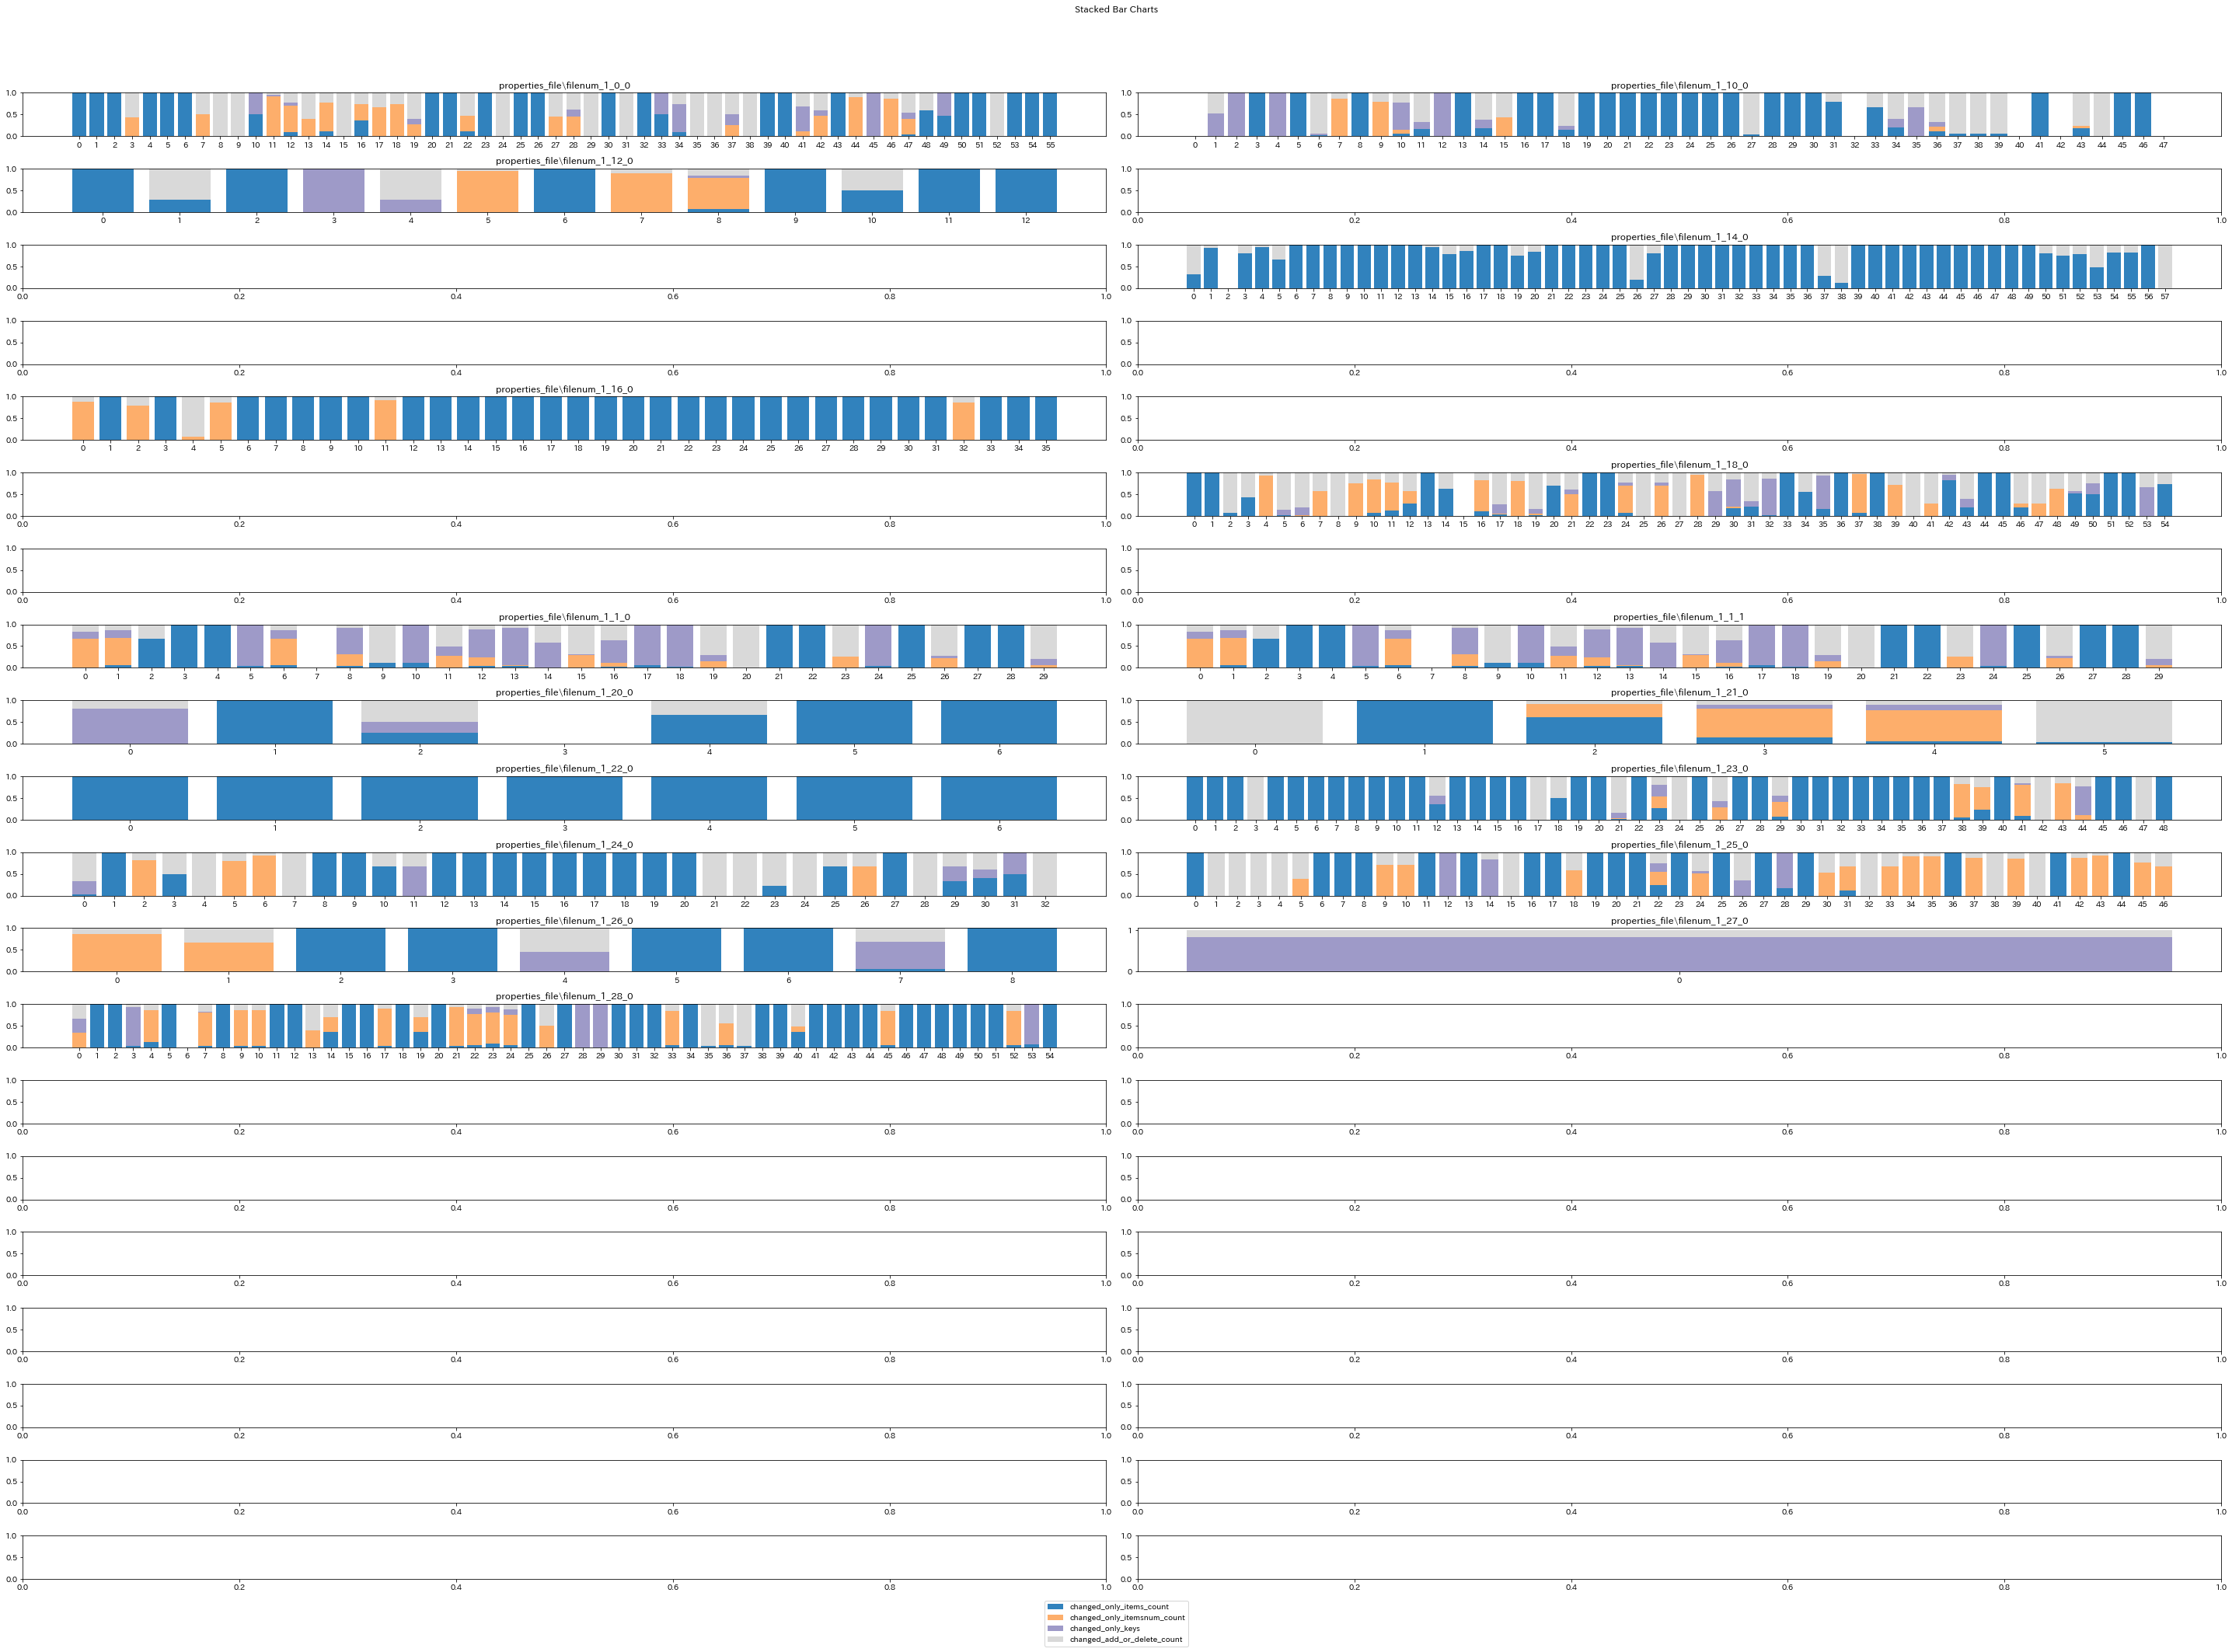

In [2028]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(count_data):
    # サブプロットのレイアウトを設定
    n_rows_subplot = len(count_data)//2 + len(count_data)%2
    n_cols_subplot = 2
    fig, axs = plt.subplots(n_rows_subplot, n_cols_subplot, figsize=(40, 30))
    fig.suptitle("Stacked Bar Charts")
    #初期位置を指定
    row_index = 0
    col_index = 0
    for data in count_data:
        if len(data) == 0:
            col_index += 1
        
            if col_index >= 2:
                row_index += 1
                col_index = 0
            continue
        df = pd.DataFrame(data)
        row_labels =range(0,len(data))
        #col_labels = ["changed_only_items_count","changed_only_itemsnum_count","changed_only_name_count","changed_name_items_count","extend_command","another_content","changed_add_or_delete_count","all_length"]
        col_labels = ["changed_only_items_count","changed_only_itemsnum_count","changed_only_keys","changed_add_or_delete_count"]
        #col_labels = ["changed_only_itemsnum_count","changed_keys_items","changed_add_or_delete_count"]
        df.index = row_labels
        df.columns = col_labels
        # 正規化する
        df = df.div(df.sum(axis=1), axis=0)
        #print(df)
        df.fillna(0, inplace=True)
        n_rows, n_cols = df.shape
        positions = np.arange(n_rows)
        offsets = np.zeros(n_rows, dtype=df.values.dtype)
        colors = plt.get_cmap("tab20c")(np.linspace(0, 1, n_cols))

        for i in range(n_cols):

            ax = axs[row_index, col_index]
            
            ax.set_xticks(positions)
            #ax.set_xticklabels(row_labels)
            ax.set_xticklabels(df.index)

            # 棒グラフを描画する
            bar = ax.bar(positions, df.iloc[:, i], bottom=offsets, color=colors[i])
            offsets += df.iloc[:, i]

            ax.set_title(diff_all_directories[row_index*2 + col_index])
            
        col_index += 1
        
        if col_index >= 2:
            row_index += 1
            col_index = 0
    # サブプロットの調整
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.legend(col_labels, loc='lower center', bbox_to_anchor=(0.5, 0))
    plt.show()

plot_data(count_data)
#plot_data(test_count_data)

In [2014]:
print(len(added_path))
print(added_path[0])

25
[{}, {}, {}, {'workflows.build_and_test.jobs.9.yarn_lint_build.requires.0': 3}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {'jobs.process_artifacts_combined.steps.8.store_artifacts.path': 3}, {'jobs.process_artifacts_combined.steps.9.store_artifacts.path': 3}, {}, {'jobs.process_artifacts_combined.steps.7.store_artifacts.path': 4}, {'jobs.get_base_build.steps.4.run.command': 4, 'jobs.get_base_build.steps.4.run.name': 4}, {'jobs.scrape_warning_messages.docker.0.image': 1, 'jobs.scrape_warning_messages.environment.TZ': 1, 'jobs.scrape_warning_messages.steps.0': 1, 'jobs.scrape_warning_messages.steps.1.run': 1, 'jobs.scrape_warning_messages.steps.2.restore_cache.keys.0': 1, 'jobs.scrape_warning_messages.steps.2.restore_cache.name': 1, 'jobs.scrape_warning_messages.steps.3.run.command': 1, 'jobs.scrape_warning_messages.steps.4.persist_to_workspace.paths.0': 1, 'jobs.scrape_warning_messages.steps.4.persist_to_workspace.root': 1, 'workflows.build_and_test.jobs.6.scrape_warning_messages.requires.

In [2010]:
#変更点を調べているときに集めた追加されたパスと削除されたパス
#added_path[0]
#delete_path[0]
default_setted_keys = ["store_artifacts","run","restore_cache","save_cache","commands","workflows","steps",
                      "executors","orbs",]

each_setted_command = []
each_changed_list = []
#added_path
#delete_path
def count_all_file(changed_path, word):
    for filecount in range(0,len(changed_path)):
        setted_command = []
        changed_list = []
        add_all_count = 0
        add_list_count = 0
        for path in changed_path[filecount]:
            for del_path, ded_part in path.items():
                #print(f"パス: {del_path},\n 追加された部分: {ded_part}")
                #print(del_path.split(".")[0:ded_part])
                #print('.'.join(del_path.split(".")[0:ded_part+1]))
                #変更点が数字の時
                if (del_path.split(".")[ded_part]).isdecimal():
                    #print(del_path)
                    changed_list.append([del_path.split('.')[ded_part] ])
                    changed_list.append(ded_part)
                    add_list_count += 1
                #変更点がcircleciのキーの場合
                elif del_path.split('.')[ded_part] in default_setted_keys:
                    add_all_count += 1
                #変更点がそれ以外（ユーザ設定したキー）
                else:
                    setted_command.append([del_path.split('.')[ded_part] ])
                    setted_command.append(ded_part)
                    add_all_count += 1
                    #print("changed default keys\n")
        each_setted_command.append(setted_command)
        each_changed_list.append(changed_list)
        print(f"{filecount}   \t {word}_all_count: {add_all_count}  \t{word}_list_count : {add_list_count}")
        
count_all_file(added_path,"add")
count_all_file(delete_path, "dele")

0   	 add_all_count: 157  	add_list_count : 80
1   	 add_all_count: 283  	add_list_count : 8
2   	 add_all_count: 18  	add_list_count : 6
3   	 add_all_count: 0  	add_list_count : 0
4   	 add_all_count: 0  	add_list_count : 0
5   	 add_all_count: 16  	add_list_count : 0
6   	 add_all_count: 0  	add_list_count : 0
7   	 add_all_count: 0  	add_list_count : 0
8   	 add_all_count: 42  	add_list_count : 0
9   	 add_all_count: 0  	add_list_count : 0
10   	 add_all_count: 0  	add_list_count : 0
11   	 add_all_count: 429  	add_list_count : 59
12   	 add_all_count: 0  	add_list_count : 0
13   	 add_all_count: 0  	add_list_count : 0
14   	 add_all_count: 744  	add_list_count : 149
15   	 add_all_count: 744  	add_list_count : 149
16   	 add_all_count: 1  	add_list_count : 0
17   	 add_all_count: 0  	add_list_count : 24
18   	 add_all_count: 0  	add_list_count : 0
19   	 add_all_count: 71  	add_list_count : 6
20   	 add_all_count: 25  	add_list_count : 5
21   	 add_all_count: 242  	add_list_count 

In [2011]:
print(each_setted_command[1])

[['compile-binary'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['build'], 1, ['push-edge'], 1, ['push-edge'], 1, ['push-edge'], 1, ['push-edge'], 1, ['push-edge'], 1, ['push-latest'], 1, ['push-latest'], 1, ['push-latest'], 1, ['push-latest'], 1, ['push-latest'], 1, ['push-release'], 1, ['push-release'], 1, ['push-release'], 1, ['push-release'], 1, ['push-release'], 1, ['test'], 1, ['test'], 1, ['test'], 1, ['test'], 1, ['test'], 1, ['test'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['build-and-push'], 1, ['load_image'], 1, ['load_image'], 1, ['load_image'], 1, ['build-image'], 1, ['build-image'], 1, ['sdk-tests'], 1, ['sdk-tests'], 1, ['sdk-tests'], 1, ['sdk-tests'], 1, ['sdk-tests'], 1, ['sdk-tes

In [2016]:
def add_or_dele_paercent(setted_command):
    print("#"*50)
    print(len(setted_command))
    count = 0
    for i in range(10):
        print(f"changedcount:{i} count : {setted_command.count(i)}")
        count += setted_command.count(i)
        if(count >= len(setted_command)/2):
            break
#全てのファイルをまとめる  
def count_data(each_setted_command):
    searched_data = []
    for together_data in each_setted_command:
        for together in together_data:
            searched_data.append(together)
    #print(searched_data)
    add_or_dele_paercent(searched_data)
#キーの変更された場所を調べる
#増えたものの場所を調べる
count_data(each_setted_command[0:25])
#減ったものの場所を調べる
count_data(each_setted_command[25:])

#リストの場所が変わったところを調べる
count_data(each_changed_list[0:25])
count_data(each_changed_list[25:])

##################################################
5164
changedcount:0 count : 34
changedcount:1 count : 2183
changedcount:2 count : 31
changedcount:3 count : 4
changedcount:4 count : 317
changedcount:5 count : 13
##################################################
3730
changedcount:0 count : 16
changedcount:1 count : 1553
changedcount:2 count : 45
changedcount:3 count : 6
changedcount:4 count : 238
changedcount:5 count : 7
##################################################
1036
changedcount:0 count : 0
changedcount:1 count : 40
changedcount:2 count : 0
changedcount:3 count : 394
changedcount:4 count : 4
changedcount:5 count : 24
changedcount:6 count : 56
##################################################
740
changedcount:0 count : 0
changedcount:1 count : 33
changedcount:2 count : 0
changedcount:3 count : 337


In [2001]:
#setted_command
#len(setted_command)
#changed_list
#len(added_path)

def open_result(each_setted_command):
    dic_count = 0
    print(len(each_setted_command))
    for setted_command in each_setted_command:
        dic_count += 1
        if(len(setted_command) == 0):
            continue
        print("#"*50)
        print(f"{len(setted_command)} + {dic_count}")
        count = 0
        for i in range(10):
            print(f"--------{i}--------")
            print(setted_command.count(i))
            count += setted_command.count(i)
            if(count >= len(setted_command)/2):
                break
    #print(dic_count)

open_result(each_setted_command[0:25])
#open_result(each_setted_command[25:])

#open_result(each_changed_list[0:25])
#open_result(each_changed_list[25:])

25
##################################################
236 + 1
--------0--------
0
--------1--------
100
--------2--------
0
--------3--------
1
--------4--------
15
--------5--------
2
##################################################
526 + 2
--------0--------
0
--------1--------
252
--------2--------
0
--------3--------
0
--------4--------
10
--------5--------
1
##################################################
20 + 3
--------0--------
10
##################################################
32 + 6
--------0--------
16
##################################################
44 + 9
--------0--------
0
--------1--------
22
##################################################
854 + 12
--------0--------
0
--------1--------
419
--------2--------
1
--------3--------
0
--------4--------
7
##################################################
1326 + 15
--------0--------
0
--------1--------
547
--------2--------
9
--------3--------
0
--------4--------
107
#################################################

In [1705]:
#値がどんなものなのかを調べる。

{'compile-binary': 1,
 'build': 1,
 'push-edge': 1,
 'push-latest': 1,
 'push-release': 1,
 'test': 1,
 'build-and-push': 1,
 'load_image': 1,
 'build-image': 1,
 'sdk-tests': 1,
 'classic-machine': 1,
 'vulnerability-scan': 1,
 'ubuntu-machine': 1,
 'integration-tests': 1,
 'environment': 5,
 'smoke-tests': 1,
 'nightly-integration-test': 1,
 'test-runner': 1,
 'eks-integration-tests': 1,
 'eks-nightly-test': 1,
 'appframework-integration-test': 1,
 'app-framework-tests': 1,
 'appfw-eks-integration-tests': 1}

In [1913]:
#+ -が続いてた時に編集されていることを確認する。
#++ --になっているときはその一つ前のファイルはどうなっているのかも見ておきたい気持ち
#完全に削除（追加）されたのか一部分の変更なのか 37- 45+多め
def search_properties_pattern(dir_num):
    filename_count = 0
    items_list = []
    diff_all_foldernames = glob.glob(str(diff_all_directories[dir_num]) + "/*")
    #for a in add_dele_properties[filename_count:filename_count+1]:
    for a in add_dele_properties[dir_num][filename_count:]:
        print(f"------------------{diff_all_foldernames[filename_count]} to {diff_all_foldernames[filename_count+1]}--------------")
        print(f"filename_count : {filename_count}")
        #変更されたコマンドのパスを集めて、それが編集後のファイルに残ているのかを調べる
        #残っているのなら、一部が編集され、残っていないなら丸ごと削除されている。
        #print(a)
        #更新後にそのコマンドのパスがあるかどうか
        is_there_command_before = []
        is_there_command_after = []
        #for serch in range(0,len(a)-1):
        max_count = len(a)
        serch = 0
        items_text = ""
        while serch < max_count:
            #print(f"serch: {serch}")
            #items_text = a[serch].split("=")[1]
            items_text = (a[serch].split(" ")[1])
            serch += 1
            items_list.append(items_text)
        filename_count += 1
    return items_list

items_list_allfile = []


#print("追加された")
#print(added_path)

#print("削除された")
#print(delete_path)
#for i in range(0,len(add_dele_properties)):
for i in range(0,3):
    #count_data.append(search_properties_pattern(i))
    
    items_list = search_properties_pattern(i)
    items_list_allfile.append(items_list)
#diff_all_foldernames = glob.glob(str(diff_all_directories[0]) + "/*")
#print(diff_all_foldernames[0])

------------------properties_file\filenum_1_0_0\2021-02-11T00-09-20Z_config.properties to properties_file\filenum_1_0_0\2021-02-16T06-04-13Z_config.properties--------------
filename_count : 0
------------------properties_file\filenum_1_0_0\2021-02-16T06-04-13Z_config.properties to properties_file\filenum_1_0_0\2021-02-16T16-31-24Z_config.properties--------------
filename_count : 1
------------------properties_file\filenum_1_0_0\2021-02-16T16-31-24Z_config.properties to properties_file\filenum_1_0_0\2021-04-12T16-49-26Z_config.properties--------------
filename_count : 2
------------------properties_file\filenum_1_0_0\2021-04-12T16-49-26Z_config.properties to properties_file\filenum_1_0_0\2021-05-12T17-14-45Z_config.properties--------------
filename_count : 3
------------------properties_file\filenum_1_0_0\2021-05-12T17-14-45Z_config.properties to properties_file\filenum_1_0_0\2021-06-08T15-26-22Z_config.properties--------------
filename_count : 4
------------------properties_file\filenu

In [1915]:
items_list_allfile[0]

['workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup\n',
 'workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=Publish',
 'workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=setup\n',
 'workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish',
 'workflows.publish_preleases_nightly.jobs.1.publish_prerelease.commit_sha=master\n',
 'workflows.publish_preleases_nightly.jobs.1.publish_prerelease.commit_sha=<<',
 'workflows.publish_preleases_nightly.jobs.2.publish_prerelease.commit_sha=master\n',
 'workflows.publish_preleases_nightly.jobs.2.publish_prerelease.commit_sha=<<',
 'workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.4=-r=www-classic',
 'workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.4=-r=www-classic',
 'workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.5=-r=www-classic',
 'workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.5=-r=www-classic',


In [1916]:
tfidf_vector = use_tf_idf(items_list_allfile[0])

特徴語: ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '40', 'add', 'aliases', 'alpha', 'america', 'and', 'angeles', 'args', 'art', 'artifacts', 'at', 'attach', 'base', 'beta', 'branches', 'browsers', 'build', 'builds', 'cache', 'canary', 'cd', 'channel', 'check', 'checkout', 'cimg', 'circleci', 'classic', 'cleanup', 'client', 'codes', 'combined', 'command', 'commands', 'commit', 'confirm', 'core', 'cp', 'cron', 'curl', 'cut', 'delete', 'dependencies', 'deploy', 'description', 'devtools', 'directory', 'dist', 'docker', 'dom', 'download', 'echo', 'environment', 'error', 'errors', 'eslint', 'experimental', 'extensions', 'facebook', 'fail', 'fetch', 'filters', 'fixtures', 'fizz', 'flow', 'for', 'forks', 'fuzz', 'generated', 'get', 'git', 'hooks', 'ignore', 'image', 'info', 'inline', 'install', 'interactions', 'jdk', 'jobs', 'js', 'json', 'key', 'keys', 'license', 'lint', 'los', 'main', 'master', 'matrix', 'messages', 'minified', 'mkdir', 'modern', 'modules', 'name',

In [1853]:
tfidf_vector

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.13198223]])]

In [126]:
#編集距離を求める
def edit_distance(word1, word2):
    len1, len2 = len(word1), len(word2)
    dp = [[0] * (len2 + 1) for _ in range(len1 + 1)]
    
    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j
    
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            cost = 0 if word1[i - 1] == word2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,      # 挿入
                dp[i][j - 1] + 1,      # 削除
                dp[i - 1][j - 1] + cost  # 置換または同一文字
            )
    
    return dp[len1][len2]

def sentence_edit_distance(sentence1, sentence2):
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    total_distance = 0
    for word1, word2 in zip(words1, words2):
        word_distance = edit_distance(word1, word2)
        total_distance += word_distance
    
    return total_distance

# 例
sentence1 = "quick brown fox"
sentence2 = "slow red cat"
distance = sentence_edit_distance(sentence1, sentence2)
print("文章間の編集距離:", distance)


文章間の編集距離: 12


In [1892]:
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

def use_tf_idf(documents):
    # 形態素解析器を初期化
    tokenizer = Tokenizer()

    # 文書のリスト
    """documents = [
        "workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup",

        "workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=Publish to Next channel",

        "workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=setup",

        "workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish to Next channel"
    ]
    """
    # 文書をトークン化して単語リストを作成
    tokenized_documents = [' '.join(token.surface for token in tokenizer.tokenize(doc)) for doc in documents]

    # TF-IDFベクトル化器を作成
    vectorizer = TfidfVectorizer()

    # 文書をTF-IDFベクトルに変換
    tfidf_matrix = vectorizer.fit_transform(tokenized_documents)

    # TF-IDFベクトルを取得
    tfidf_vector = tfidf_matrix.toarray()

    # 特徴語（キーワード）を取得
    features = vectorizer.get_feature_names()

    # 結果を表示
    print("特徴語:", features)
    print("TF-IDFベクトル:")
    print(tfidf_vector)
    
    return tfidf_vector

In [1871]:
len(items_list_allfile[0])
#len(tfidf_vector)

56

In [1917]:
import numpy as np

def cos_simmilar(num):
    # 2つのベクトルを定義
    vector1 = tfidf_vector[num]
    for i in range(num+1,len(tfidf_vector)):
        vector2 = tfidf_vector[i]

        # ベクトルを正規化
        norm_vector1 = np.linalg.norm(vector1)
        norm_vector2 = np.linalg.norm(vector2)

        if norm_vector1!=0 and norm_vector2 != 0:
            normalized_vector1 = vector1 / norm_vector1
            normalized_vector2 = vector2 / norm_vector2
        else:
            #print("noen")
            continue
        # コサイン類似度を計算
        cosine_similarity = np.dot(normalized_vector1, normalized_vector2)

        if cosine_similarity >= 1:
            #print(items_list_allfile[0][num])
            #print(items_list_allfile[0][num+1])
            continue
        elif cosine_similarity == 0:
            continue
        elif cosine_similarity >= 0.8:# and cosine_similarity <= 0.1:# and False:
            print(items_list_allfile[0][num])
            print(items_list_allfile[0][i])
        # 結果を表示
        #print("コサイン類似度:", cosine_similarity)

    
for z in range(0,len(tfidf_vector)-1):
    cos_simmilar(z)

workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases.jobs.0=setup

workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases.jobs.1.publish_prerelease.name=Publish
workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=setup

workflows.publish_preleases.jobs.1.publish_prerelease.name=Publish
workflows.publish_p

workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.1.publish_prerelease.requires.0=Publish
workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.2.publish_prerelease.name=Publish
workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases_nightly.jobs.1.publish_prerelease.name=Publish
workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases_nightly.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases_nightly.jobs.2.publish_prerelease.requires.0=Publish
workflows.publish_preleases_nightly.jobs.0.publish_prerelease.release_channel=stable

workflows.publish_preleases_nightly.jobs.2.publish_prerelease.req

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.9=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.9=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_te

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.9=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.9=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_

jobs.RELEASE_CHANNEL_stable_yarn_lint_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.build_devtools_scheduling_profiler.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.RELEASE_CHANNEL_stable_yarn_lint_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.RELEASE_CHANNEL_stable_yarn_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.RELEASE_CHANNEL_stable_yarn_lint_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.yarn_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.RELEASE_CHANNEL_stable_yarn_lint_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.check_error_codes.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.RELEASE_CHANNEL_stable_yarn_lint_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.yarn_check_release_dependencies.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.RELEASE_CHANNEL_stable_yarn_lint_build.environment.TZ=/usr/s

workflows.experimental.jobs.4.build_devtools_scheduling_profiler.requires.0=yarn_build

workflows.experimental.jobs.5.deploy_devtools_scheduling_profiler.requires.0=build_devtools_scheduling_profiler

workflows.experimental.jobs.4.build_devtools_scheduling_profiler.requires.0=yarn_build

workflows.experimental.jobs.4.deploy_devtools_scheduling_profiler.requires.0=build_devtools_scheduling_profiler

workflows.experimental.jobs.4.build_devtools_scheduling_profiler.requires.0=yarn_build

workflows.experimental.jobs.4.deploy_devtools_scheduling_profiler.requires.0=build_devtools_scheduling_profiler

workflows.experimental.jobs.3.build_devtools_scheduling_profiler.requires.0=yarn_build

workflows.experimental.jobs.5.deploy_devtools_scheduling_profiler.requires.0=build_devtools_scheduling_profiler

workflows.experimental.jobs.3.build_devtools_scheduling_profiler.requires.0=yarn_build

workflows.experimental.jobs.4.deploy_devtools_scheduling_profiler.requires.0=build_devtools_scheduling_profi

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.2.publish_prerelease.dist_tag=experimental

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=experimental

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.2.publish_prerelease.dist_tag=

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,
workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,
workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,
workflows.publish_preleases.jobs.2.publish_prerelease.dist_tag=experimental

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,
workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=experimental

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,
workflows.publish_preleases_nightly.jobs.2.publish_prerelease.dist_tag=experimental
workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,
workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=experimental
workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,
w

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,alpha

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,alpha

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,alpha

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,alpha

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,alpha

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,alpha

workflows.publish_preleases_nightly.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelea

jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test.steps.1.run=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test.steps.1.run.command=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test_build.steps.2.run=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_build_combined.steps.1.run.command=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test.steps.1.run.command=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test.steps.3.run=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test.steps.2.run=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test_build.steps.5.run=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test_build.steps.3.run=yarn
jobs.yarn_test_build.steps.4.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_test_build.steps.4.run=yarn
jobs.yarn_test.steps.1.run=yarn
jobs.yarn_test_build.steps.4.run=yarn
jobs.yarn_test_build.steps.2.run.command=yarn
jobs.yarn_test_build.

jobs.build_devtools_scheduling_profiler.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.setup.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.build_devtools_scheduling_profiler.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.yarn_build_combined.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.build_devtools_scheduling_profiler.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.yarn_build.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.build_devtools_scheduling_profiler.steps.0=checkout

jobs.deploy_devtools_scheduling_profiler.steps.0=checkout

jobs.build_devtools_scheduling_profiler.steps.1.attach_workspace.at=build

jobs.deploy_devtools_scheduling_profiler.steps.1.attach_workspace.at=packages/react-devtools-scheduling-profiler

jobs.build_devtools_scheduling_profiler.steps.2.run=yarn
jobs.build_devtools_scheduling_profiler.steps.5.run.command=yarn
jobs.build_devtools_scheduling_profiler.steps.2.run=yarn
jobs.bu

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.3.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.5.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.5.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.p

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.p

workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.p

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.2=-r=exper

workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.6.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.6.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.6.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.arg

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_te

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.9=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.9=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_

workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.6.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.6.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.3.ya

workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.13=-r=experimental
workflows.build_and_test.jobs.6.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.13=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.13=-r=experimental
workflows.build_and_test.jobs.6.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.13=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.3=-r

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.5.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.8.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.9.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.5.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.9.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.4.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.

workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.job

workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.arg

workflows.build_and_test.jobs.7.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.7.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.7.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.7.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.sizebot.filters.branches.ignore.0=main

workflows.build_and_te

workflows.build_and_test.jobs.9.sizebot.requires.0=get_base_build

workflows.build_and_test.jobs.8.get_base_build.requires.0=setup

workflows.build_and_test.jobs.9.sizebot.requires.0=get_base_build

workflows.build_and_test.jobs.9.get_base_build.requires.0=setup

workflows.build_and_test.jobs.9.sizebot.requires.0=get_base_build

workflows.build_and_test.jobs.10.sizebot.requires.0=get_base_build

workflows.build_and_test.jobs.9.sizebot.requires.0=get_base_build

workflows.build_and_test.jobs.9.get_base_build.requires.0=setup

workflows.build_and_test.jobs.9.sizebot.requires.0=get_base_build

workflows.build_and_test.jobs.10.sizebot.requires.0=get_base_build

workflows.build_and_test.jobs.8.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.7.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.8.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.8.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.


workflows.build_and_test.jobs.5.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.9.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.8.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.7.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.7.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.7.yarn_test_build

workflows.build_and_test.jobs.11.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.15.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.15.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.14.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.14.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.requires.0=yarn_build_combined

w

workflows.build_and_test.jobs.12.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.13.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.13.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.16.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.16.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.6.process_artifacts_combined.requires.1=yarn_build



jobs.RELEASE_CHANNEL_stable_yarn_build.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_build.steps.2.restore_cache.keys.0=v2-node-{{
jobs.RELEASE_CHANNEL_stable_yarn_build.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_build.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_build.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_build.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_build.steps.2.restore_cache.keys.0=v2-node-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.0=v2-node-{{
jobs.RELEASE_CHANNEL_stable_yarn_buil

jobs.yarn_build.steps.0=checkout

jobs.yarn_build_combined.steps.0=checkout

jobs.yarn_build.steps.1.run=yarn
jobs.yarn_build_combined.steps.1.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_test.steps.1.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_test_build.steps.2.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_build_combined.steps.3.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_build_combined.steps.2.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_test.steps.3.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_test.steps.2.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_test_build.steps.5.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_test_build.steps.3.run=yarn
jobs.yarn_build.steps.1.run=yarn
jobs.yarn_build_combined.steps.2.run=yarn
jobs.yarn_build.steps.2.restore_cache.name=Restore
jobs.sizebot.steps.5.restore_cache.name=Restore
jobs.yarn_build.steps.2.restore_cache.name=Restore
jobs.sizebot.steps.4.restore_cache.name=Restore
jobs.yarn_build.s

jobs.yarn_build.steps.5.persist_to_workspace.paths.6=dist

jobs.yarn_build_combined.steps.4.persist_to_workspace.paths.0=build

jobs.yarn_build.steps.5.persist_to_workspace.paths.6=dist

jobs.yarn_build_combined.steps.3.persist_to_workspace.paths.0=build

jobs.yarn_build.steps.5.persist_to_workspace.paths.6=dist

jobs.yarn_build_combined.steps.3.persist_to_workspace.paths.0=build

jobs.yarn_build.steps.5.persist_to_workspace.paths.6=dist

jobs.yarn_build.steps.3.persist_to_workspace.paths.0=build

jobs.yarn_build_combined.steps.4.persist_to_workspace.paths.0=build2

jobs.download_build.steps.4.persist_to_workspace.paths.0=base-build

jobs.yarn_build_combined.steps.4.persist_to_workspace.paths.0=build2

jobs.download_build.steps.4.persist_to_workspace.paths.0=base-build

jobs.yarn_build_combined.steps.4.persist_to_workspace.paths.0=build2

jobs.download_build.steps.4.persist_to_workspace.paths.0=build

jobs.yarn_build_combined.steps.4.persist_to_workspace.paths.0=build2

jobs.download_b

jobs.scrape_warning_messages.steps.2.restore_cache.name=Restore
jobs.scrape_warning_messages.steps.2.restore_cache.keys.0=v2-node-{{
jobs.scrape_warning_messages.steps.2.restore_cache.name=Restore
jobs.scrape_warning_messages.steps.2.restore_cache.keys.0=v2-node-{{
jobs.scrape_warning_messages.steps.2.restore_cache.keys.0=v2-node-{{
jobs.scrape_warning_messages.steps.2.restore_cache.name=Restore
jobs.scrape_warning_messages.steps.2.restore_cache.keys.0=v2-node-{{
jobs.scrape_warning_messages.steps.1.restore_cache.name=Restore
jobs.scrape_warning_messages.steps.2.restore_cache.keys.0=v2-node-{{
jobs.scrape_warning_messages.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.scrape_warning_messages.steps.2.restore_cache.keys.0=v2-node-{{
jobs.scrape_warning_messages.steps.1.restore_cache.name=Restore
jobs.scrape_warning_messages.steps.2.restore_cache.keys.0=v2-node-{{
jobs.scrape_warning_messages.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.scrape_warning_messages.steps.4.persis

workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.get_base_build.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.download_base_build_for_sizebot.filter

workflows.build_and_test.jobs.10.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.10.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build

workflows.build_and_test.jobs.10.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.8.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined



workflows.build_and_test.jobs.13.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.build_and_test.jobs.6.process_artifacts_combined.requires.1=yarn_build

jobs.check_error_codes.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.yarn_check_release_dependencies.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.check_error_codes.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.run_devtools_e2e_tests.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.check_error_codes.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.run_devtools_tests_for_versions.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.check_error_codes.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.run_devtools_e2e_tests_for_versions.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.check_error_codes.environment.TZ=/usr/share/zoneinfo/America/Los_Angeles

jobs.get_base_build.environment.TZ=/usr/share/zoneinfo

jobs.setup.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.yarn_lint.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.setup.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.yarn_flow.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.setup.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.yarn_build_combined.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.setup.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.get_base_build.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.setup.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.process_artifacts_combined.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.setup.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.sizebot.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.setup.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.build_devtools_and_process_artifacts.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.setup.docker.0

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.doc


jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.get_base_build.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.sizebot.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.get_base_build.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.yarn_lint_build.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.get_base_build.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.yarn_test.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.get_base_build.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.yarn_test_build.docker.0.image=circleci/openjdk:8-jdk-node-browsers

jobs.process_artifacts_combined.docker.0.image=

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint_build.docker.0.image=ci

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_flow.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.download_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.test_

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next,alpha

workflows.publish_preleases_nightly.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleas


workflows.build_and_test.jobs.13.yarn_check_release_dependencies.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.yarn_check_release_dependencies.requires.0=yarn_build_combined

workflows.build_and_test.jobs.13.yarn_check_release_dependencies.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.yarn_check_release_dependencies.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.yarn_check_release_dependencies.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.yarn_check_release_dependencies.requires.0=yarn_build_combined

workflows.build_and_test.jobs.11.yarn_check_release_dependencies.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.check_error_codes.requires.0=yarn_build_combined

workflows.build_and_test.jobs.13.check_error_codes.requires.0=yarn_build_combined

workflows.build_and_test.jobs.12.check_error_codes.requires.0=yarn_build_combined

workflows.build_and_test.jobs.13.check_error_codes.requires.0=yarn_buil

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases_nightly.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next,beta

workflows.publish_preleases_nightly.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag

jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests.steps.2.run=yarn
jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_tests_for_versions.steps.2.run.command=yarn
jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.2.run.command=yarn
jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_tests_for_versions.steps.2.run.command=yarn
jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_tests_for_versions.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.2.run.command=yarn
jobs.run_devtools_e2e_tests.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests.steps.5.run.name=Playwright
jobs.run_devtools_e2e_tes


jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.2-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.2-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.download_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.download_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-nod

jobs.scrape_warning_messages.docker.0.image=cimg/openjdk:17.0.2-node

jobs.scrape_warning_messages.docker.0.image=cimg/openjdk:18.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.build_devtools_and_process_artifacts.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.build_devtools_and_process_artifacts.docker.0.image=cimg/openjdk:17.0.2-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.2-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.build_devtools_and_process_artifacts.docker.0.image=cimg/openjdk:17.0.2-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.build_devtools_and_process_artifacts.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.


jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.2-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_tests_for_versions.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests_for_versions.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:18.0-node

jobs.run_devtools_e2e

jobs.yarn_check_release_dependencies.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_check_release_dependencies.docker.0.image=cimg/openjdk:18.0-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:17.0.0-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:18.0-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:17.0.2-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:18.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.test_fuzz.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.test_fuzz.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test.docker.0.im

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.download_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.test_fuzz.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.download_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.run_devtools_e2e_tests.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_build_combined.docker.0.image=ci

jobs.setup.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.download_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_lint_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17

jobs.yarn_check_release_dependencies.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_check_release_dependencies.docker.0.image=cimg/openjdk:18.0-node

jobs.yarn_check_release_dependencies.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_check_release_dependencies.docker.0.image=cimg/openjdk:18.0-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:17.0.2-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:18.0-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:17.0.0-node

jobs.check_error_codes.docker.0.image=cimg/openjdk:18.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test_build.docker.0.image=cimg/openjdk:17.0.0-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.2-node

jobs.test_fuzz.docker.0.image=cimg/openjdk:17.0.2-node

jobs.yarn_test.docker.0.image=cimg/openjdk:17.0.2-node

jobs.test_fuzz.docker.0.image=cimg/o

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build_combined.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build_combined.steps.3.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.3.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build_combined.steps.3.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build.

jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_tests_for_versions.steps.4.run.command=yarn
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_tests_for_versions.steps.6.run=node
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.4.run.command=yarn
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_e2e_tests.steps.2.run=yarn
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_tests_for_versions.steps.2.run.name=Preparing
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_tests_for_versions.steps.2.run.command=yarn
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.2.run.name=Preparing
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.2.run.command=yarn
jobs.run_devtools_tests_for_versions.steps.2.run=yarn
jobs.run_devtools_tests_for

workflows.devtools_regression_tests.jobs.0=setup

workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.0=setup

workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.0=setup

workflows.devtools_regression_tests.jobs.1.download_build.requires.0=setup

workflows.devtools_regression_tests.jobs.0=setup

workflows.devtools_regression_tests.jobs.1.download_build.requires.0=setup

workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.1.download_build.requires.0=setup

workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.0=setup

workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.1.download_build.requires.0=setup

workflows.devtools_regression_tests.jobs.

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.4=18.0

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.0=16.0

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.1=16.5

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.2=16.8

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.3=17.0

workflo

jobs.run_devtools_tests_for_versions.steps.5.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.7.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_tests_for_versions.steps.5.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.7.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_tests_for_versions.steps.5.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.5.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_tests_for_versions.steps.5.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.7.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_tests_for_versions.steps.5.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps

jobs.run_devtools_e2e_tests_for_versions.steps.6.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.7.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_e2e_tests_for_versions.steps.6.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.7.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_e2e_tests_for_versions.steps.6.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.5.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_e2e_tests_for_versions.steps.7.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests.steps.6.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests_for_versions.steps.7.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests.steps.4.run.environment.RELEASE_CHANNEL=experimental

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.2=16.8

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.2=16.8

workflows.devtools_regression_tests.jobs.2.run_devtools_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.2=16.8

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.matrix.parameters.version.4=18.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.2=16.8

workflows.devtools_regression_tests.jobs.2.run_devtools_tests_for_versions.matrix.parameters.version.4=18.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.2=16.8


workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.1.download_build.requires.0=setup

workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.0=setup

workflows.devtools_regression_tests.jobs.1.yarn_build_combined.requires.0=setup

workflows.devtools_regression_tests.jobs.1.download_build.requires.0=setup

workflows.devtools_regression_tests.jobs.1.get_base_build.requires.0=setup

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=get_base_build

workflows.devtools_regression_tests.jobs.1.get_base_build.requires.0=setup

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=get_base_build

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=yarn_build_combined

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifac

jobs.download_build.steps.2.restore_cache.keys.0=v2-node-{{
jobs.download_build.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.download_build.steps.2.restore_cache.keys.0=v2-node-{{
jobs.download_build.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.download_build.steps.3.run.name=Download
jobs.download_base_build_for_sizebot.steps.3.run.name=Download
jobs.download_build.steps.3.run.name=Download
jobs.download_build.steps.1.run=yarn
jobs.download_build.steps.3.run.name=Download
jobs.download_base_build_for_sizebot.steps.3.run.name=Download
jobs.download_build.steps.3.run.name=Download
jobs.download_base_build_for_sizebot.steps.2.run.name=Download
jobs.download_build.steps.3.run.command=git
jobs.download_base_build_for_sizebot.steps.3.run.command=git
jobs.download_build.steps.3.run.command=git
jobs.download_base_build_for_sizebot.steps.3.run.command=git
jobs.download_build.steps.3.run.command=git
jobs.download_base_build_for_sizebot.steps.2.run.command=git
jobs.download_build

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build_combined.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build_combined.steps.3.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.4.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.download_build.steps.3.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build_combined.steps.3.persist_to_workspace.root=.

jobs.get_base_build.steps.5.persist_to_workspace.root=.

jobs.yarn_build.steps.3.persist_to_workspace.root=.

jobs.download_base_build_for_sizebot.steps.5.persist_to_workspace.root=.

job

workflows.devtools_regression_tests.jobs.1.download_build.requires.0=setup

workflows.devtools_regression_tests.jobs.0=setup

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=get_base_build

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=download_build

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=get_base_build

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=download_build

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=get_base_build

workflows.devtools_regression_tests.jobs.1.build_devtools_and_process_artifacts.requires.0=download_build

workflows.devtools_regression_tests.jobs.2.build_devtools_and_process_artifacts.requires.0=download_build

workflows.devtools_regression_tests.jobs.3.run_devtools_tests_for_versions.requires.0=build_devtools_and_process_artifacts

w

aliases.3.restore_cache.keys.0=v2-node-{{
aliases.2.restore_cache.keys.0=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.2.restore_cache.keys.0=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.2.restore_cache.keys.1=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.2.restore_cache.keys.1=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.2.restore_cache.keys.2=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.2.restore_cache.keys.2=v1-yarn_cache-

aliases.3.restore_cache.keys.0=v2-node-{{
aliases.2.restore_cache.keys.3=v1-yarn_cache-

aliases.3.restore_cache.keys.0=v2-node-{{
aliases.6.restore_cache.keys.0=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.6.restore_cache.keys.1=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.6.restore_cache.keys.2=v1-yarn_cache-{{
aliases.3.restore_cache.keys.0=v2-node-{{
aliases.6.restore_cache.keys.3=v1-yarn_cache-

aliases.3.res

jobs.download_base_build_for_sizebot.steps.1.run.command=yarn
jobs.download_base_build_for_sizebot.steps.2.run.command=git
jobs.download_base_build_for_sizebot.steps.1.run.command=yarn
jobs.download_base_build_for_sizebot.steps.2.run.command=git
jobs.process_artifacts_combined.steps.2.run.name=Preparing
jobs.build_devtools_and_process_artifacts.steps.2.run.name=Preparing
jobs.process_artifacts_combined.steps.2.run.name=Preparing
jobs.build_devtools_and_process_artifacts.steps.2.run.name=Preparing
jobs.process_artifacts_combined.steps.2.run=yarn
jobs.process_artifacts_combined.steps.2.run.command=yarn
jobs.process_artifacts_combined.steps.2.run=yarn
jobs.process_artifacts_combined.steps.2.run.command=yarn
jobs.sizebot.steps.3.run=yarn
jobs.sizebot.steps.3.run.command=yarn
jobs.sizebot.steps.3.run=yarn
jobs.sizebot.steps.3.run.command=yarn
jobs.sizebot.steps.3.run.command=yarn
jobs.sizebot.steps.5.run.command=node
jobs.sizebot.steps.3.run.command=yarn
jobs.sizebot.steps.4.run.command=nod

jobs.yarn_lint_build.steps.2.run.command=yarn
jobs.yarn_lint_build.steps.4.run=yarn
jobs.yarn_lint_build.steps.2.run.command=yarn
jobs.yarn_lint_build.steps.3.run=yarn
jobs.yarn_check_release_dependencies.steps.2.run.name=Preparing
jobs.yarn_check_release_dependencies.steps.2.run=yarn
jobs.yarn_check_release_dependencies.steps.2.run.name=Preparing
jobs.yarn_check_release_dependencies.steps.4.run=yarn
jobs.yarn_check_release_dependencies.steps.2.run.name=Preparing
jobs.yarn_check_release_dependencies.steps.3.run=yarn
jobs.yarn_check_release_dependencies.steps.2.run=yarn
jobs.yarn_check_release_dependencies.steps.2.run.command=yarn
jobs.yarn_check_release_dependencies.steps.2.run=yarn
jobs.yarn_check_release_dependencies.steps.2.run.name=Preparing
jobs.yarn_check_release_dependencies.steps.2.run=yarn
jobs.yarn_check_release_dependencies.steps.2.run.command=yarn
jobs.yarn_check_release_dependencies.steps.2.run.command=yarn
jobs.yarn_check_release_dependencies.steps.4.run=yarn
jobs.yarn_ch

jobs.publish_prerelease.steps.1.run=yarn
jobs.publish_prerelease.steps.1.run.command=yarn
jobs.publish_prerelease.steps.1.run=yarn
jobs.publish_prerelease.steps.1.run.command=yarn
jobs.publish_prerelease.steps.1.run=yarn
jobs.publish_prerelease.steps.3.run.name=Run
jobs.publish_prerelease.steps.1.run=yarn
jobs.publish_prerelease.steps.2.run.name=Run
jobs.sync_reconciler_forks.steps.1.run.name=Preparing
jobs.sync_reconciler_forks.steps.1.run=yarn
jobs.sync_reconciler_forks.steps.1.run=yarn
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.1.run=yarn
jobs.sync_reconciler_forks.steps.1.run.name=Preparing
jobs.sync_reconciler_forks.steps.1.run=yarn
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.1.run=yarn
jobs.sync_reconciler_forks.steps.5.run.command=yarn
jobs.sync_reconciler_forks.steps.1.run=yarn
jobs.sync_reconciler_forks.steps.4.run.command=yarn
jobs.sync_reconciler_forks.steps.1.run=yarn
jobs.sync_reconciler_for

aliases.10.save_cache.paths.6=packages/react-devtools-inline/node_modules

jobs.setup.steps.7.save_cache.paths.6=packages/react-devtools-inline/node_modules

aliases.10.save_cache.paths.6=packages/react-devtools-inline/node_modules

aliases.10.save_cache.paths.10=packages/react-devtools/node_modules

aliases.10.save_cache.paths.6=packages/react-devtools-inline/node_modules

jobs.setup.steps.7.save_cache.paths.6=packages/react-devtools-inline/node_modules

aliases.10.save_cache.paths.7=packages/react-devtools-shared/node_modules

aliases.10.save_cache.paths.10=packages/react-devtools/node_modules

aliases.10.save_cache.paths.7=packages/react-devtools-shared/node_modules

jobs.setup.steps.7.save_cache.paths.7=packages/react-devtools-shared/node_modules

aliases.10.save_cache.paths.7=packages/react-devtools-shared/node_modules

aliases.10.save_cache.paths.10=packages/react-devtools/node_modules

aliases.10.save_cache.paths.7=packages/react-devtools-shared/node_modules

jobs.setup.steps.7.

jobs.setup.steps.2.restore_cache.key=v2-node-{{
jobs.setup.steps.5.save_cache.key=v2-node-{{
jobs.setup.steps.2.restore_cache.key=v2-node-{{
jobs.setup.steps.6.save_cache.key=v2-node-{{
jobs.setup.steps.3.restore_cache.name=Restore
jobs.yarn_build_combined.steps.2.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.yarn_build_combined.steps.1.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.download_build.steps.2.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.download_build.steps.1.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.sizebot.steps.4.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.sizebot.steps.3.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.yarn_test.steps.2.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.yarn_test.steps.1.restore_cache.name=Restore
jobs.setup.steps.3.r

jobs.setup.steps.7.save_cache.paths.14=packages/react-reconciler/node_modules

aliases.10.save_cache.paths.14=packages/react-reconciler/node_modules

jobs.setup.steps.7.save_cache.paths.15=packages/react-server-dom-relay/node_modules

aliases.10.save_cache.paths.15=packages/react-server-dom-relay/node_modules

jobs.setup.steps.7.save_cache.paths.16=packages/react-server-dom-webpack/node_modules

aliases.10.save_cache.paths.16=packages/react-server-dom-webpack/node_modules

jobs.setup.steps.7.save_cache.paths.17=packages/react-server-native-relay/node_modules

aliases.10.save_cache.paths.17=packages/react-server-native-relay/node_modules

jobs.setup.steps.7.save_cache.paths.18=packages/react-server/node_modules

aliases.10.save_cache.paths.18=packages/react-server/node_modules

jobs.setup.steps.7.save_cache.paths.19=packages/react-test-renderer/node_modules

aliases.10.save_cache.paths.19=packages/react-test-renderer/node_modules

jobs.setup.steps.7.save_cache.paths.20=packages/react/no

jobs.yarn_build_combined.steps.2.restore_cache.name=Restore
jobs.download_build.steps.1.restore_cache.name=Restore
jobs.yarn_build_combined.steps.2.restore_cache.name=Restore
jobs.process_artifacts_combined.steps.2.restore_cache.name=Restore
jobs.yarn_build_combined.steps.2.restore_cache.name=Restore
jobs.yarn_lint_build.steps.2.restore_cache.name=Restore
jobs.yarn_build_combined.steps.2.restore_cache.name=Restore
jobs.yarn_test.steps.1.restore_cache.name=Restore
jobs.yarn_build_combined.steps.2.restore_cache.name=Restore
jobs.yarn_test_build.steps.2.restore_cache.name=Restore
jobs.yarn_build_combined.steps.1.restore_cache.name=Restore
jobs.download_build.steps.2.restore_cache.name=Restore
jobs.yarn_build_combined.steps.1.restore_cache.name=Restore
jobs.download_build.steps.1.restore_cache.name=Restore
jobs.yarn_build_combined.steps.1.restore_cache.name=Restore
jobs.process_artifacts_combined.steps.3.restore_cache.name=Restore
jobs.yarn_build_combined.steps.1.restore_cache.name=Restore

jobs.download_build.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.yarn_test_build.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.download_build.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.download_base_build_for_sizebot.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.download_build.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.yarn_test_build.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.download_build.steps.3.run.name=Download
jobs.download_base_build_for_sizebot.steps.3.run.name=Download
jobs.download_build.steps.3.run.name=Download
jobs.download_base_build_for_sizebot.steps.2.run.name=Download
jobs.download_build.steps.2.run.name=Download
jobs.download_base_build_for_sizebot.steps.3.run.name=Download
jobs.download_build.steps.2.run.name=Download
jobs.download_base_build_for_sizebot.steps.2.run.name=Download
jobs.download_build.steps.3.run.command=git
jobs.download_base_build_for_sizebot.steps.3.run.command=git
jobs.download_build.steps.3.run.

jobs.process_artifacts_combined.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.yarn_build_combined.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.process_artifacts_combined.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.build_devtools_and_process_artifacts.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.process_artifacts_combined.steps.6.store_artifacts.path=./build2.tgz

jobs.build_devtools_and_process_artifacts.steps.6.store_artifacts.path=./build/devtools.tgz

jobs.process_artifacts_combined.steps.6.store_artifacts.path=./build2.tgz

jobs.build_devtools_and_process_artifacts.steps.4.store_artifacts.path=./build/devtools.tgz

jobs.process_artifacts_combined.steps.7.store_artifacts.path=./build2.tgz

jobs.build_devtools_and_process_artifacts.steps.6.store_artifacts.path=./build/devtools.tgz

jobs.process_artifacts_combined.steps.7.store_artifacts.path=./build2.tgz

jobs.build_devtools_and_process_artifacts.steps.4.store_artifacts.path=./build/devtools.tgz

jobs.

jobs.run_devtools_e2e_tests.steps.5.run.command=npx
jobs.run_devtools_e2e_tests_for_versions.steps.5.run.command=npx
jobs.run_devtools_e2e_tests.steps.5.run.command=npx
jobs.run_devtools_e2e_tests_for_versions.steps.3.run.command=npx
jobs.run_devtools_e2e_tests.steps.3.run.command=npx
jobs.run_devtools_e2e_tests_for_versions.steps.5.run.command=npx
jobs.run_devtools_e2e_tests.steps.3.run.command=npx
jobs.run_devtools_e2e_tests_for_versions.steps.3.run.command=npx
jobs.run_devtools_e2e_tests.steps.6.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests_for_versions.steps.7.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests.steps.6.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests_for_versions.steps.5.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests.steps.4.run.environment.RELEASE_CHANNEL=experimental

jobs.run_devtools_e2e_tests_for_versions.steps.7.run.environment.RELEASE_CHANNEL=experimental

j

jobs.run_devtools_e2e_tests_for_versions.steps.3.restore_cache.keys.0=v2-node-{{
jobs.run_devtools_tests_for_versions.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.run_devtools_e2e_tests_for_versions.steps.3.restore_cache.keys.0=v2-node-{{
jobs.run_devtools_e2e_tests_for_versions.steps.2.restore_cache.name=Restore
jobs.run_devtools_e2e_tests_for_versions.steps.3.restore_cache.keys.0=v2-node-{{
jobs.run_devtools_e2e_tests_for_versions.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.run_devtools_e2e_tests_for_versions.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.8.run.command=rm
jobs.run_devtools_e2e_tests_for_versions.steps.4.run.command=yarn
jobs.run_devtools_e2e_tests_for_versions.steps.6.run.command=rm
jobs.run_devtools_e2e_tests_for_versions.steps.6.run=./scripts/circleci/download_devtools_regression_build.js
jobs.run_devtools_e2e_tests_for_versions.steps.7.run.command=./scripts/circleci/run_devtools_e2e_tests.js
jobs.run_devtools_e2e_tests_for

jobs.yarn_test.steps.2.run=yarn
jobs.yarn_test_build.steps.4.run.command=yarn
jobs.yarn_test.steps.2.run=yarn
jobs.yarn_test_build.steps.5.run=yarn
jobs.yarn_test.steps.2.run=yarn
jobs.yarn_test_build.steps.3.run=yarn
jobs.yarn_test.steps.2.run=yarn
jobs.yarn_build.steps.2.run=yarn
jobs.yarn_test_build.steps.2.run.command=yarn
jobs.yarn_test_build.steps.5.run=yarn
jobs.yarn_test_build.steps.2.run.command=yarn
jobs.yarn_test_build.steps.3.run=yarn
jobs.yarn_test_build.steps.3.restore_cache.name=Restore
jobs.setup.steps.2.restore_cache.name=Restore
jobs.yarn_test_build.steps.3.restore_cache.name=Restore
jobs.setup.steps.3.restore_cache.name=Restore
jobs.yarn_test_build.steps.3.restore_cache.name=Restore
jobs.yarn_lint.steps.1.restore_cache.name=Restore
jobs.yarn_test_build.steps.3.restore_cache.name=Restore
jobs.yarn_build_combined.steps.1.restore_cache.name=Restore
jobs.yarn_test_build.steps.3.restore_cache.name=Restore
jobs.download_build.steps.1.restore_cache.name=Restore
jobs.yarn_te

jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.1=v1-yarn_cache-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.2=v1-yarn_cache-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.6.save_cache.paths.0=~/.cache/yarn

jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.2=v1-yarn_cache-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.name=Restore
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.2=v1-yarn_cache-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.3=v1-yarn_cache-

jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.6.save_cache.paths.0=~/.cache/yarn

jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixt

jobs.publish_prerelease.steps.2.restore_cache.keys.0=v2-node-{{
jobs.publish_prerelease.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.publish_prerelease.steps.2.restore_cache.keys.0=v2-node-{{
jobs.publish_prerelease.steps.1.restore_cache.keys.0=v1-node_modules-{{
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.3.run.command=cut
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.2.run.command=cut
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.4.run.command=cut
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.3.run.command=cut
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.2.run.command=cut
jobs.sync_reconciler_forks.steps.1.run.command=yarn
jobs.sync_reconciler_forks.steps.3.run.command=cut
jobs.sync_reconciler_forks.steps.2.restore_cache.name=Restore
jobs.sync_reconciler_forks.steps.2.restore_cache

jobs.download_base_build_for_sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.download_base_build_for_sizebot.docker.0.image=cimg/openjdk:18.0-node

jobs.download_base_build_for_sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:17.0.0-node

jobs.download_base_build_for_sizebot.docker.0.image=cimg/openjdk:18.0-node

jobs.sizebot.docker.0.image=cimg/openjdk:18.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:18.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:17.0.0-node

jobs.build_devtools_and_process_artifacts.docker.0.image=cimg/openjdk:17.0.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:18.0-node

jobs.build_devtools_and_process_artifacts.docker.0.image=cimg/openjdk:18.0-node

jobs.process_artifacts_combined.docker.0.image=cimg/openjdk:18.0-node

jobs.yarn_build_combined.docker.0.image=cimg/openjdk:18.0-node


workflows.build_and_test.jobs.4.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.5.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.5.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test

workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.2=-r=exper

workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_te

workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameter

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.7.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.6.scrape_warning_messages.requires.0=setup

workflows.build_and_test.jobs.7.process_artifacts_combined.requires.0=scrape_warning_messages

workflows.build_and_test.jobs.6.scrape_warning_messages.requires.0=setup

workflows.build_and_test.jobs.8.process_artifacts_combined.requires.0=scrape_warning_messages

workflows.build_and_test.jobs.6.scrape_warning_messages.requires.0=setup

workflows.build_and_test.jobs.8.process_artifacts_combined.requires.0=scrape_warning_messages

workflows.build_and_test.jobs.6.scrape_warning_messages.req

workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.0=-r=stable
work

workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.9.yarn_test_build.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.4.yarn_test.matrix.paramete

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.11.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.11

jobs.sync_reconciler_forks.steps.3.run.command=cut
jobs.sync_reconciler_forks.steps.4.run.command=yarn
workflows.build_and_test.jobs.3.check_generated_fizz_runtime.requires.0=setup

jobs.check_generated_fizz_runtime.steps.2=setup_node_modules

workflows.build_and_test.jobs.2.check_generated_fizz_runtime.requires.0=setup

jobs.check_generated_fizz_runtime.steps.2=setup_node_modules

workflows.build_and_test.jobs.4.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.5.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.4.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.5.yarn_test.requires.0=setup

workflows.build_and_test.jobs.3.yarn_lint.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build

workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.2=-r=experimental
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.3=-r=experimental
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.5.yarn_test.matrix.p

workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.5.yarn_test.matrix.parameters.args.8=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_te

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.9.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.8.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.4.yarn_test.requires.0=setup

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.8.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.7.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.6.yarn_build_combined.requires.0=setup

workflows.build_and_test.jobs.7.yarn_test_build.requires.0

workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.jobs.10.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.9.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.8.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.download_base_build_for_sizebot.filters.branches.ignore.0=main

workflows.build_and_test.jobs.10.sizebot.filters.branches.ignore.0=main

aliases.5.save_cache.name=Save
aliases.10.save_cache.name=Save
aliases.5.save_cache.name=Save
jobs.setup.steps.6.save_cache.name=Save
aliases.5.save_cache.name=Save
jobs.setup.steps.7.save_cache.name=Save
aliases.5.save_cache.name=Save
aliases.10.save_cache.name=Save
aliases.5.save_cache.name=Save
jobs.setup.steps.6.save_cache.name=Save
aliases.5.save_cache.name=Save
jobs.setup.steps.7.save_cache.name=Save
aliases.5.save_cache.key=v1-yarn_cache-{{
jobs.setup.steps.6.save_cache.key=v1-yarn_cache-{{
aliases.5.save_cache.key=v1-yarn_cache-{{
jobs.setup.steps.6.save_cache.key=v1-yarn_cache-{{
aliases.6.restore_cache.name=Restore
aliases.11.restore_cache.name=Restore
aliases.6.restore_cache.name=Restore
jobs.yarn_test.steps.1.restore_cache.name=Restore
aliases.8.run.when=on_fail

jobs.setup.steps.5.run.when=on_fail

aliases.9.save_cache.name=Save
aliases.10.save_cache.name=Save
aliases.9.save_cache.name=Save
jobs.setup.steps.6.save_cache.name=Save
aliases.9.save_cache.name=Save
jobs.setup.s

jobs.setup.steps.6.save_cache.key=v1-yarn_cache-{{
jobs.setup.steps.7.save_cache.key=v1-node_modules-{{
jobs.setup.steps.6.save_cache.key=v1-yarn_cache-{{
aliases.5.save_cache.key=v1-yarn_cache-{{
jobs.setup.steps.6.save_cache.key=v1-yarn_cache-{{
aliases.5.save_cache.key=v2-yarn_cache-{{
jobs.setup.steps.6.save_cache.paths.0=~/.cache/yarn

jobs.setup.steps.7.save_cache.paths.0=node_modules

jobs.setup.steps.7.save_cache.key=v1-node_modules-{{
commands.setup_node_modules.steps.2.save_cache.key=v1-yarn_cache-{{
jobs.setup.steps.7.save_cache.key=v1-node_modules-{{
commands.setup_node_modules.steps.2.save_cache.key=v2-yarn_cache-{{
jobs.yarn_lint.steps.1=setup_node_modules

jobs.yarn_lint_build.steps.2=setup_node_modules

jobs.yarn_lint.steps.1.restore_cache.name=Restore
jobs.yarn_lint_build.steps.2.restore_cache.name=Restore
jobs.yarn_lint.steps.1.restore_cache.name=Restore
jobs.yarn_test.steps.1.restore_cache.name=Restore
jobs.yarn_lint.steps.1.restore_cache.name=Restore
jobs.yarn_test_

jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.1=v1-yarn_cache-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.2=v1-yarn_cache-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.2.restore_cache.keys.0=v1-node_modules-{{
jobs.RELEASE_CHANNEL_stable_yarn_test_dom_fixtures.steps.3.restore_cache.keys.3=v1-yarn_cache-

workflows.build_and_test.jobs.0.yarn_flow.filters.branches.ignore.0=builds/facebook-www

workflows.build_and_test.jobs.2.yarn_lint.filters.branches.ignore.0=builds/facebook-www

workflows.build_and_test.jobs.0.yarn_flow.filters.branches.ignore.0=builds/facebook-www

workflows.build_and_test.jobs.0.setup.filters.branches.ignore.0=builds/facebook-www

workflows.build_and_test.jobs.0.yarn_flow.filters.branches.ig

workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.10=-r=www-modern
workflows.build_and_test.jobs.3.yarn_test.matrix.parameters.args.11=-r=www-modern
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.7.yarn_test_build.matrix.parameters.args.0=-r=stable
workflows.build_and_test.jobs.4.yarn_test.matrix.parameters.args.12=-r=stable
workflows.build_and_test.jobs.8.yarn_test_build.matrix.parameters.args.1=-r=stable
workflows.build_and_test.

workflows.build_and_test.jobs.10.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.10.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.10.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build

workflows.build_and_test.jobs.10.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.7.yarn_test_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build_combined

workflows.build_and_test.jobs.9.sizebot.requires.1=yarn_build

workflows.build_and_test.jobs.11.yarn_lint_build.requires.0=yarn_build_combined

workflows.build_and_test.jobs.10.yarn_lint_

workflows.devtools_regression_tests.jobs.3.run_devtools_e2e_tests_for_versions.matrix.parameters.version.0=16.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.3.run_devtools_e2e_tests_for_versions.matrix.parameters.version.0=16.0

workflows.devtools_regression_tests.jobs.3.run_devtools_e2e_tests_for_versions.matrix.parameters.version.3=17.0

workflows.devtools_regression_tests.jobs.3.run_devtools_e2e_tests_for_versions.matrix.parameters.version.0=16.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters.version.4=18.0

workflows.devtools_regression_tests.jobs.3.run_devtools_e2e_tests_for_versions.matrix.parameters.version.0=16.0

workflows.devtools_regression_tests.jobs.3.run_devtools_e2e_tests_for_versions.matrix.parameters.version.4=18.0

workflows.devtools_regression_tests.jobs.4.run_devtools_e2e_tests_for_versions.matrix.parameters

workflows.publish_preleases.jobs.1.publish_prerelease.release_channel=experimental

workflows.publish_preleases.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases.jobs.1.publish_prerelease.release_channel=experimental

workflows.publish_preleases.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases.jobs.1.publish_prerelease.release_channel=experimental

workflows.publish_preleases.jobs.1.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.1.publish_prerelease.release_channel=experimental

workflows.publish_preleases.jobs.1.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.2.publish_prerelease.dist_tag=experimental

workflows.publish_preleases_nightly.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.2.publish_prerelease.dist_tag=experimental

workflows.publish_preleases_nightly.jobs.1.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.2.publish_prerelease.dist_tag=experimental


workflows.publish_preleases.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases_nightly.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases_nightly.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases_nightly.jobs.1.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.0.publish_prerelease.name=Publish
workflows.publish_preleases_nightly.jobs.1.publish_prerelease.requires.0=Publish
workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=canary,next

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases.jobs.0.publish_prerelease.dist_tag=next

workflows.publish_preleases_nightly.jobs.0.publish_prereleas

In [162]:
tokenized_documents

['-   workflows . publish _ preleases . jobs . 2 . publish _ prerelease . requires . 0 = setup',
 '+   workflows . publish _ preleases . jobs . 2 . publish _ prerelease . requires . 0 = Publish   to   Next   channel',
 '-   workflows . publish _ preleases _ nightly . jobs . 2 . publish _ prerelease . requires . 0 = setup',
 '+   workflows . publish _ preleases _ nightly . jobs . 2 . publish _ prerelease . requires . 0 = Publish   to   Next   channel']